**Disclaimer:** Dataset and homework are made up for educational purposes.

**Dataset:** `wiki_machine_learning.csv`

**Description:** The data represents how many times the Wikipedia page of "Machine Learning" was read during a certain period of time. The data is presented in CSV format with the following columns: `date`, `count`, `lang`, `page`, `rank`, `month`, `title`. Null values in the `count` column are represented by 0, and these should be removed during preprocessing.

### Column Explanations

1. **date**: The dates on which the Wikipedia page was read, formatted as `datetime`.
2. **count**: The number of times the page was read. Null values (represented as zeros) must be removed during preprocessing.
3. **lang**: The language of the page (e.g., "en" for English).
4. **page**: The name of the Wikipedia page (in this case, "Machine Learning").
5. **rank**: The ranking of the page based on the number of reads, indicating its popularity.
6. **month**: The month extracted from the date, represented numerically (1-12).
7. **title**: The title of the page (in this case, "Machine Learning").

### Task

You are asked to create a model using **Facebook Prophet** and **Neural Prophet** algorithms to predict how many times the article will be read in the future for the next 30 days (using the `count` column).

**Disclaimer:** Dataset və ev tapşırığı tədris məqsədləri üçün hazırlanmışdır.

**Dataset:** `wiki_machine_learning.csv`

**Təsvir:** Bu məlumat "Maşın Öyrənmə" Wikipedia səhifəsinin müəyyən bir dövr ərzində neçə dəfə oxunduğunu göstərir. Məlumat CSV formatında aşağıdakı sütunlarla təqdim olunur: `date`, `count`, `lang`, `page`, `rank`, `month`, `title`. `count` sütunundakı null dəyərlər 0 ilə göstərilir və bunlar preprocessinq zamanı silinməlidir.

### Sütunların Təsvirləri

1. **date**: Wikipedia səhifəsinin oxunduğu tarixlər, `datetime` formatında.
2. **count**: Səhifənin neçə dəfə oxunduğunu göstərir. Null dəyərlər (0 ilə göstərilən) preprocessinq zamanı silinməlidir.
3. **lang**: Səhifənin dili (məsələn, "en" ingilis dili üçün).
4. **page**: Wikipedia səhifəsinin adı (bu halda "Maşın Öyrənmə").
5. **rank**: Oxunma sayına əsasən səhifənin reytinqi, onun populyarlığını göstərir.
6. **month**: Tarixdən çıxarılan ay, ədədi şəkildə (1-12) göstərilir.
7. **title**: Səhifənin adı (bu halda "Maşın Öyrənmə").

### Tapşırıq

Sizdən **Facebook Prophet** və **Neural Prophet** alqoritmlərini istifadə edərək `count` sütunundan istifadə edərək gələcək 30 gün ərzində səhifənin neçə dəfə oxunacağını proqnozlaşdıran bir model yaratmağınız xahiş olunur.

In [1]:
import warnings  # Xəbərdarlıqları idarə etmək üçün lazımlı kitabxananı yükləyir
import itertools  # İterasiya alətləri üçün lazımlı kitabxana
import numpy as np  # Sayısal hesablamalar üçün Numpy kitabxanasını yükləyir
import matplotlib.pyplot as plt  # Qrafiklər çəkmək üçün Matplotlib-in pyplot modülünü yükləyir
warnings.filterwarnings("ignore")  # Xəbərdarlıqları gizlətmək üçün istifadə olunur
plt.style.use('fivethirtyeight')  # Qrafiklərin stilini 'fivethirtyeight' stili ilə təyin edir
import pandas as pd  # Məlumat analizi üçün Pandas kitabxanasını yükləyir
import matplotlib  # Matplotlib kitabxanasını qlobal parametrləri dəyişmək üçün yükləyir

# Qrafik oxlarının etiket ölçüsünü təyin edir
matplotlib.rcParams['axes.labelsize'] = 14  
# X oxunun etiket ölçüsünü təyin edir
matplotlib.rcParams['xtick.labelsize'] = 12  
# Y oxunun etiket ölçüsünü təyin edir
matplotlib.rcParams['ytick.labelsize'] = 12  
# Bütün mətnlərin rəngini qara edir
matplotlib.rcParams['text.color'] = 'k'  


In [2]:
import copy
import pandas as pd
data = pd.read_csv(r'C:\Users\dell\Desktop\Python\week10\wiki_machine_learning.csv', sep=' ')
df = copy.deepcopy(data.reset_index(drop=True))
df

,date,count,lang,page,rank,month,title
0,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
1,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
2,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
3,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
4,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
...,...,...,...,...,...,...,...
379,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
380,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
382,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning


### 1. Data Type Check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    384 non-null    object
 1   count   384 non-null    int64 
 2   lang    384 non-null    object
 3   page    384 non-null    object
 4   rank    384 non-null    int64 
 5   month   384 non-null    int64 
 6   title   384 non-null    object
dtypes: int64(3), object(4)
memory usage: 21.1+ KB


In [4]:
df.columns

Index(['date', 'count', 'lang', 'page', 'rank', 'month', 'title'], dtype='object')

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 384 entries, 0 to 383
Series name: date
Non-Null Count  Dtype         
--------------  -----         
384 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.1 KB


In [7]:
df['month'] = pd.to_datetime(df.month, format='%Y%m').dt.strftime('%Y-%B')

In [8]:
df.month.info()

<class 'pandas.core.series.Series'>
RangeIndex: 384 entries, 0 to 383
Series name: month
Non-Null Count  Dtype 
--------------  ----- 
384 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


In [9]:
df

,date,count,lang,page,rank,month,title
0,2015-01-01,1414,en,Machine_learning,8708,2015-January,Machine_learning
1,2015-01-02,1920,en,Machine_learning,8708,2015-January,Machine_learning
2,2015-01-03,1338,en,Machine_learning,8708,2015-January,Machine_learning
3,2015-01-04,1404,en,Machine_learning,8708,2015-January,Machine_learning
4,2015-01-05,2264,en,Machine_learning,8708,2015-January,Machine_learning
...,...,...,...,...,...,...,...
379,2016-01-16,1644,en,Machine_learning,8708,2016-January,Machine_learning
380,2016-01-17,1836,en,Machine_learning,8708,2016-January,Machine_learning
381,2016-01-18,2983,en,Machine_learning,8708,2016-January,Machine_learning
382,2016-01-19,3389,en,Machine_learning,8708,2016-January,Machine_learning


### 2.Missing values

In [10]:
df.isnull().sum()

date     0
count    0
lang     0
page     0
rank     0
month    0
title    0
dtype: int64

In [11]:
df[df['count']==0]

,date,count,lang,page,rank,month,title
35,2015-02-05,0,en,Machine_learning,8708,2015-February,Machine_learning


In [12]:
import numpy as np
df['count'] = df['count'].replace(to_replace=0, value=np.nan)

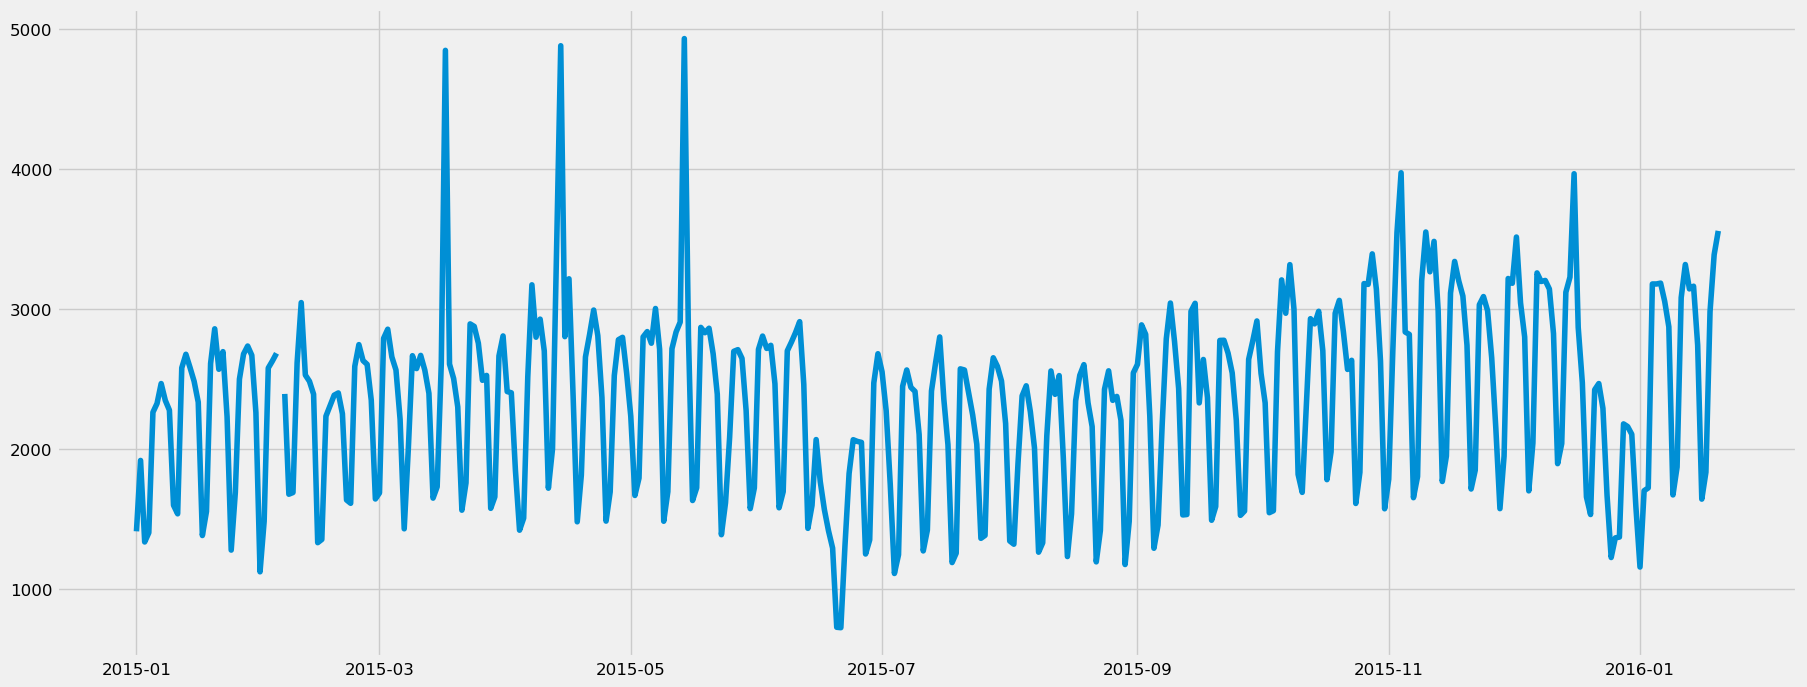

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.plot(df['date'], df['count'])

### Null value fill

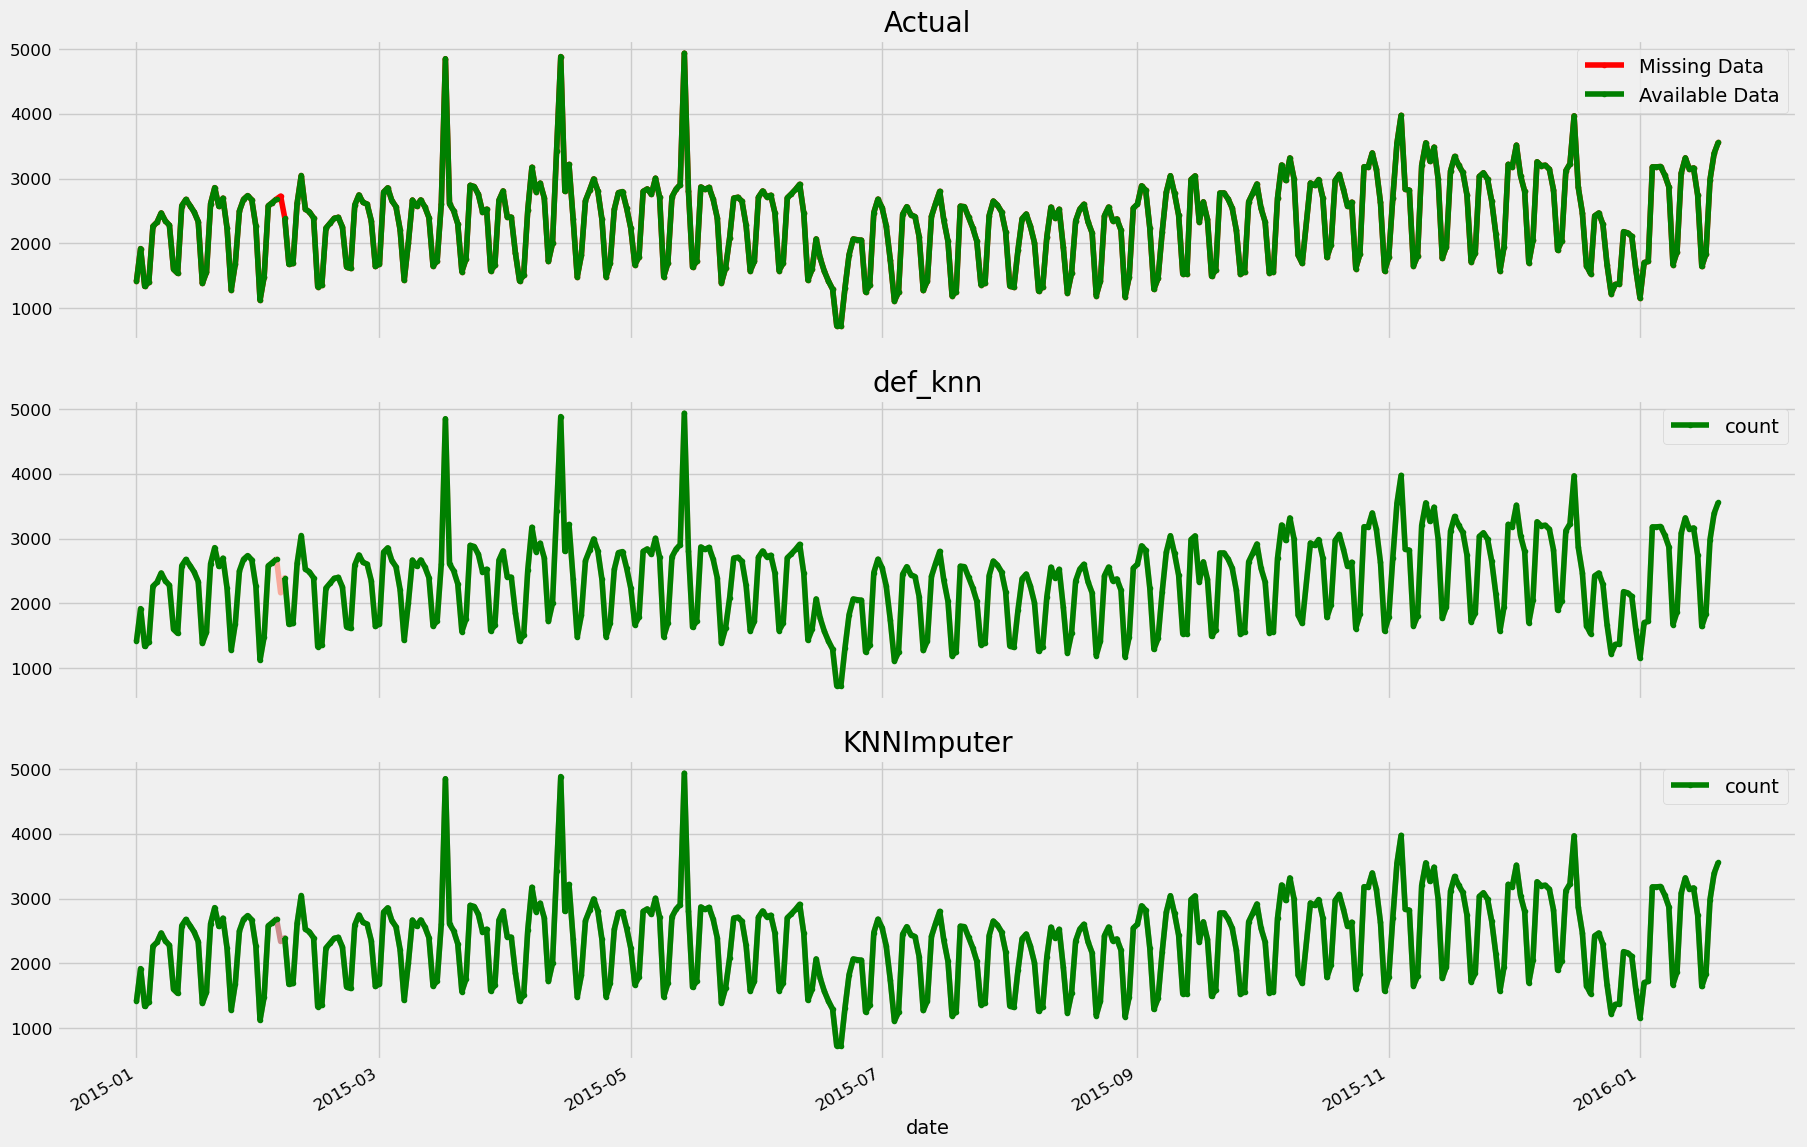

In [14]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20, 15))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df[['date', 'count']].set_index('date').interpolate (method = 'cubic').\
                                        plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df[['date', 'count']].set_index('date').plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])


## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

knn_result = knn_mean(df['count'], 8)
axes[1].plot(df['date'], knn_result, label='KNN Mean', color='tomato', alpha=0.5, linestyle='-')
df[['date', 'count']].set_index('date').plot(title='def_knn', ax=axes[1], label='Actual', color='green', style=".-")

### Elave
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=8)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df[['count']]))
axes[2].plot(df['date'], df_knn_imputed, label='KNNImputer', color='brown', alpha=0.5, linestyle="-")
df[['date', 'count']].set_index('date').plot(title='KNNImputer', ax=axes[2], label='Actual', color='green', style=".-")
plt.show()

In [15]:
df.isnull().sum()

date     0
count    1
lang     0
page     0
rank     0
month    0
title    0
dtype: int64

### KNNImputer Null Value Fill 

In [16]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=8)
df['count'] = knn_imputer.fit_transform(df[['count']])

In [17]:
df.isnull().sum()

date     0
count    0
lang     0
page     0
rank     0
month    0
title    0
dtype: int64

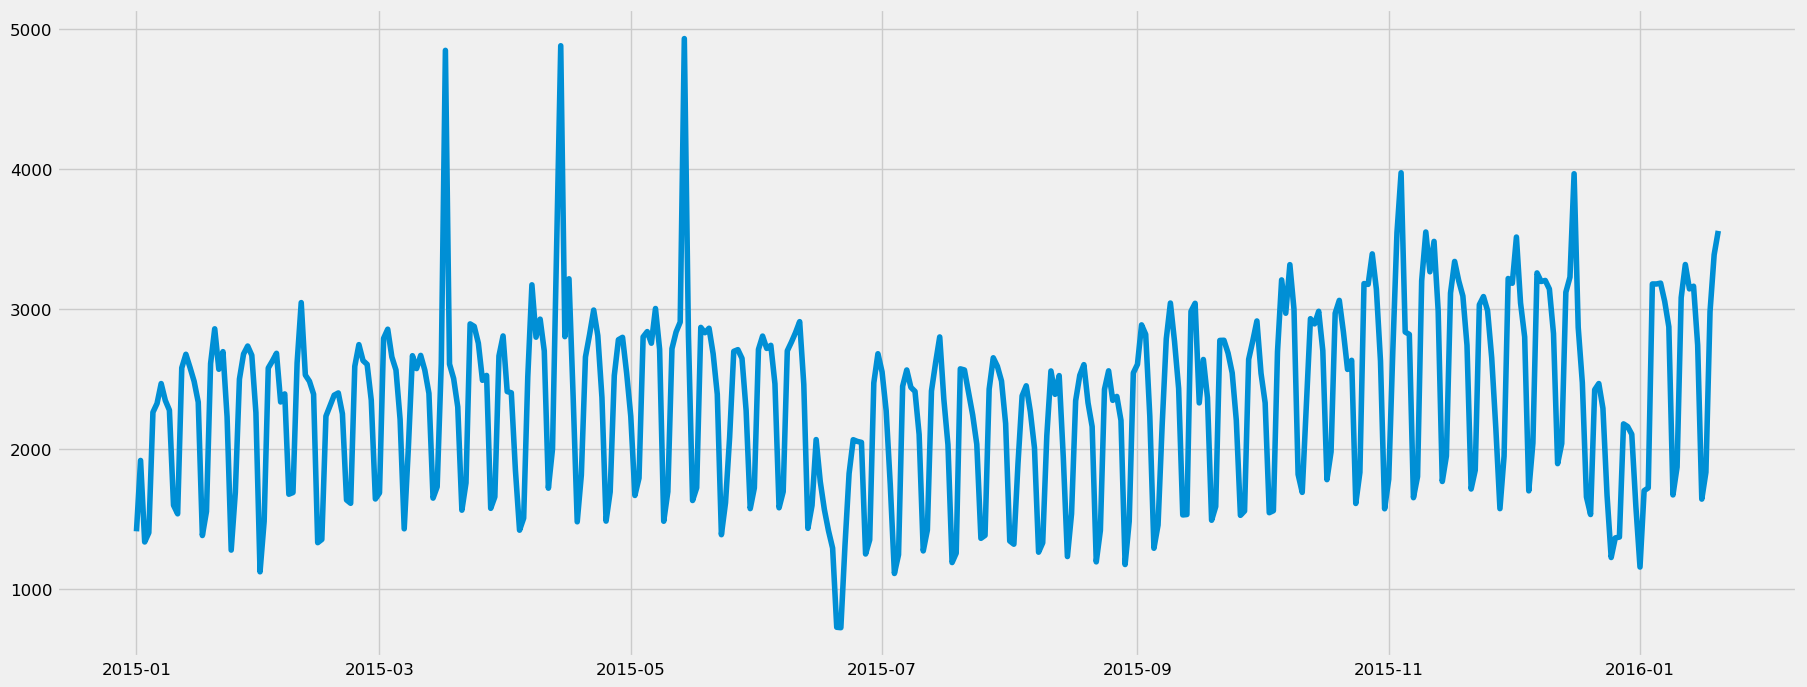

In [18]:
plt.figure(figsize=(20, 8))
plt.plot(df['date'], df['count'])
plt.show()

### Daytime Time Series every Year PLot

In [19]:
# Prepare data
df_yr = copy.deepcopy(df.set_index('date'))

df_yr['year'] = [d.year for d in df_yr.index]
df_yr['day'] = [d.strftime('%m%d') for d in df_yr.index]
years = df_yr['year'].unique()

In [20]:
import numpy as np
import matplotlib as mpl
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()),
                            len(years),
                            replace=False)

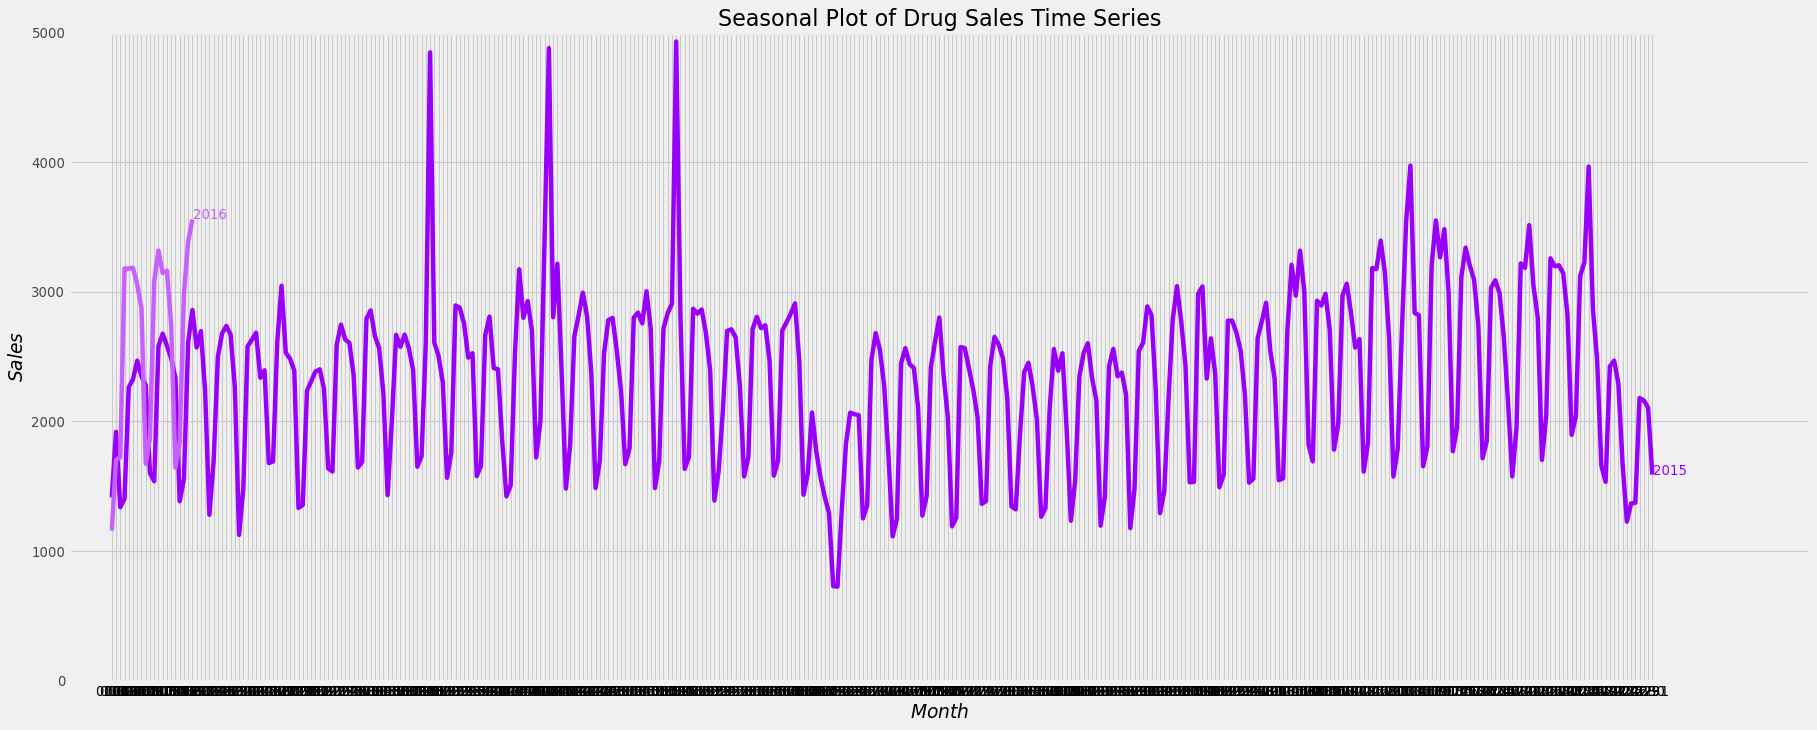

In [21]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Draw Plot
plt.figure(figsize=(25, 10), dpi=80)
for i, y in enumerate(years):
    if i >= 0:
        plt.plot('day', 'count', data=df_yr.loc[df_yr.year==y, :], color=mycolors[i], label=y)
        plt.text(df_yr.loc[df_yr.year==y, :].shape[0]-.9, df_yr.loc[df_yr.year==y, 'count'][-1:].values[0], y, fontsize=12, 
                                                                                             color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-10, 400), ylim=(0, 5000), ylabel='$Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

### Monthly Time Series every Year BoxPLot

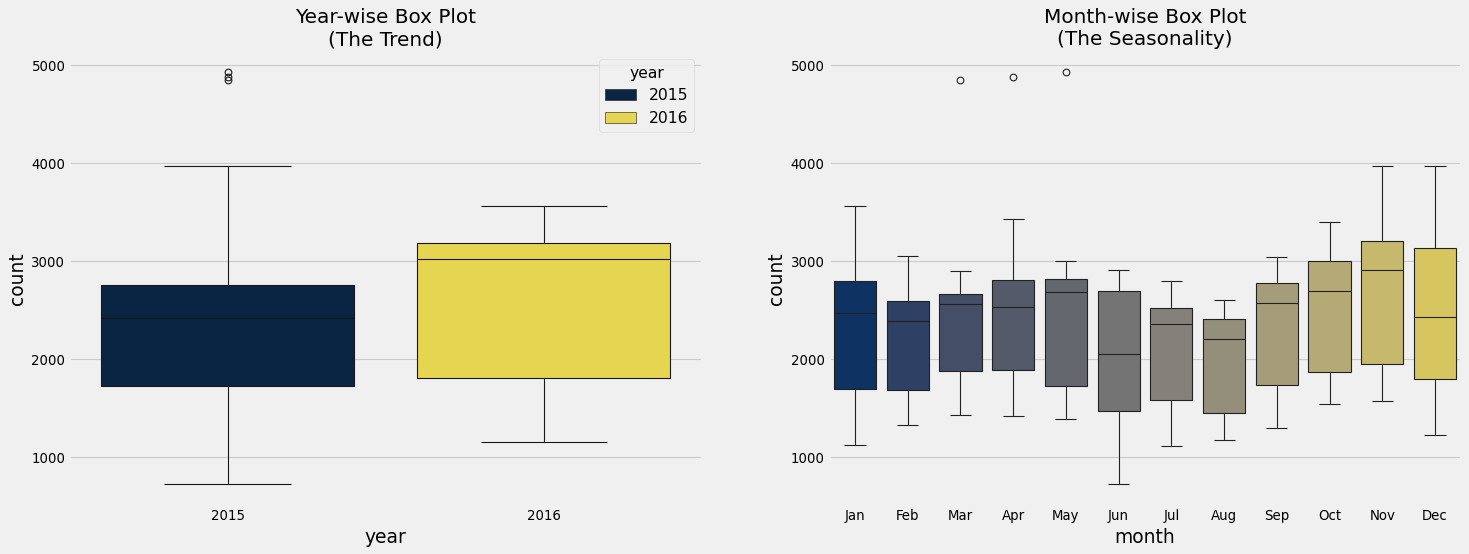

In [22]:
# Prepare data
import seaborn as sns
df_date = copy.deepcopy(df.set_index('date'))

df_date['year'] = [d.year for d in df_date.index]
df_date['month'] = [d.strftime('%b') for d in df_date.index]
years = df_date['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='count', data=df_date, ax=axes[0], hue='year', palette='cividis')
sns.boxplot(x='month', y='count', data=df_date.loc[~df_date.year.isin([1991, 2008]), :], ax=axes[1], hue='month',
                                                                                            palette='cividis')

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

### Montly Bar Plot

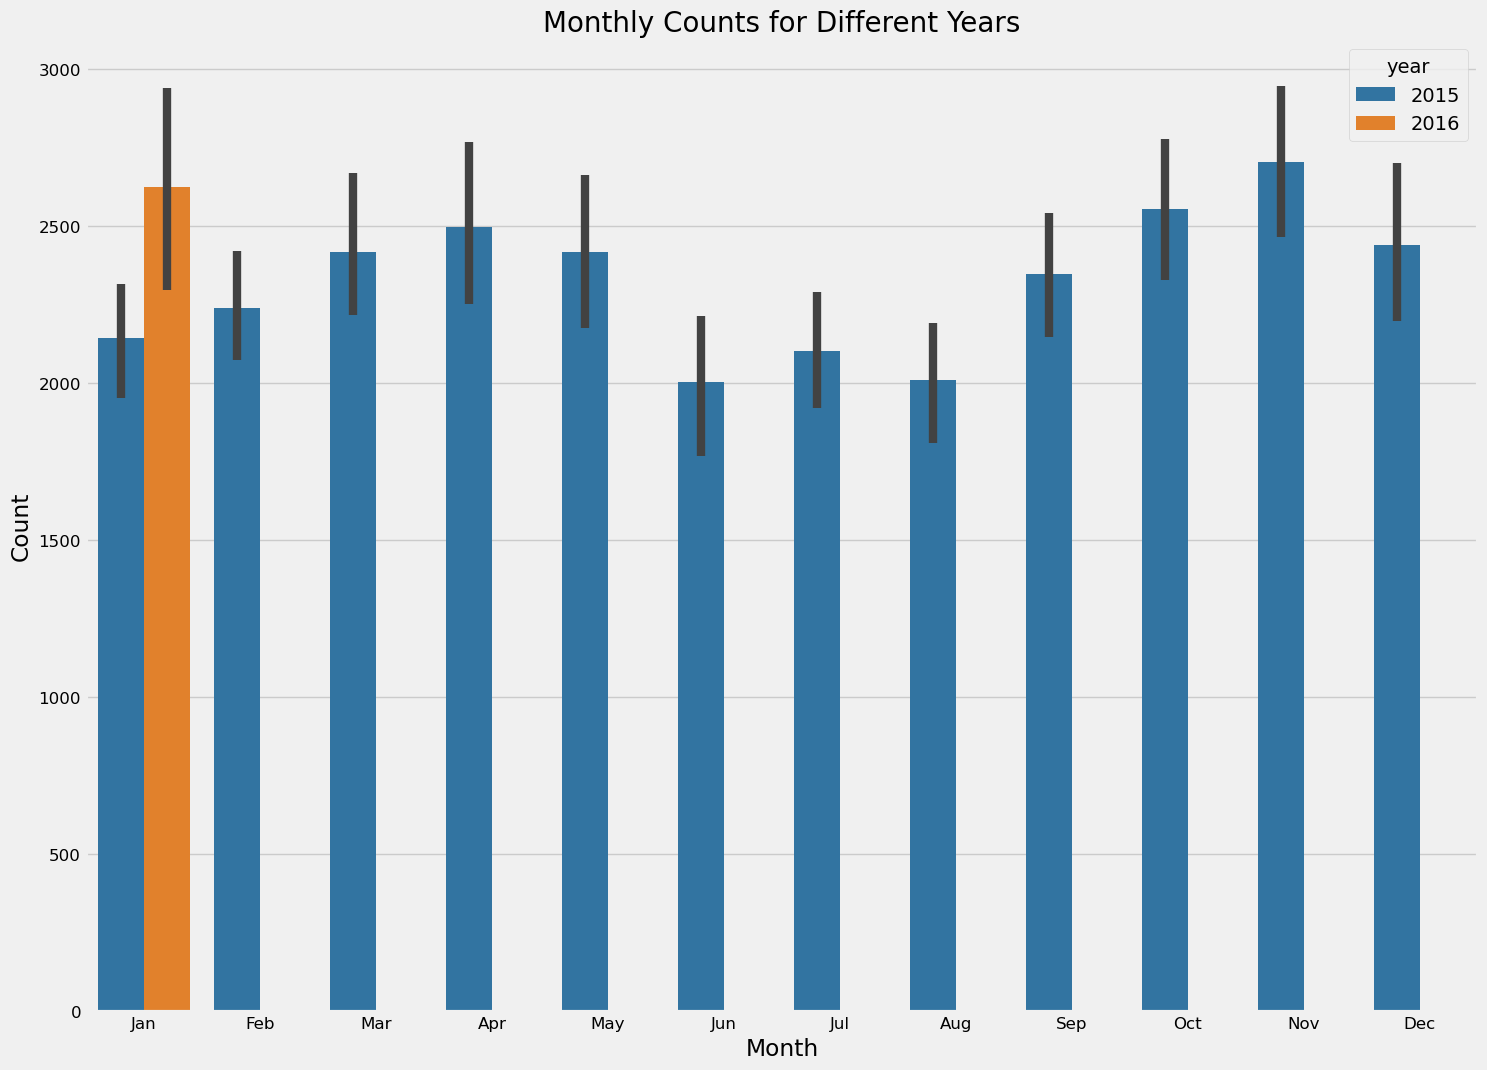

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
sns.barplot(x='month', y='count', hue='year', data=df_date, palette="tab10")
plt.title("Monthly Counts for Different Years", fontsize=20)
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


### Test for Stationarity

In [24]:
from statsmodels.tsa.stattools import adfuller, kpss

In [25]:
from statsmodels.tsa.stattools import adfuller  # ADF testini yerinə yetirmək üçün lazımlı funksiyanı yükləyir

# ADF Test
result = adfuller(df['count'].values, autolag='AIC')  # 'value' sütununu istifadə edərək ADF testini yerinə yetirir
print(f'ADF Statistic: {result[0]}')  # ADF statistik dəyərini çap edir
print(f'p-value: {result[1]}')  # p-dəyərini çap edir
for key, value in result[4].items():  # Tənqidi dəyərləri çap etmək üçün döngü
    print('Critial Values:')  # 'Critial Values' başlığını çap edir
    print(f'{key}, {value}')  # Tənqidi dəyəri və onun müvafiq dəyərini çap edir


ADF Statistic: -3.295191241403254
p-value: 0.015094799283876859
Critial Values:
1%, -3.4482453822848496
Critial Values:
5%, -2.8694261442901396
Critial Values:
10%, -2.5709711770439507


### Autocorrelation and Partial Autocorrelation

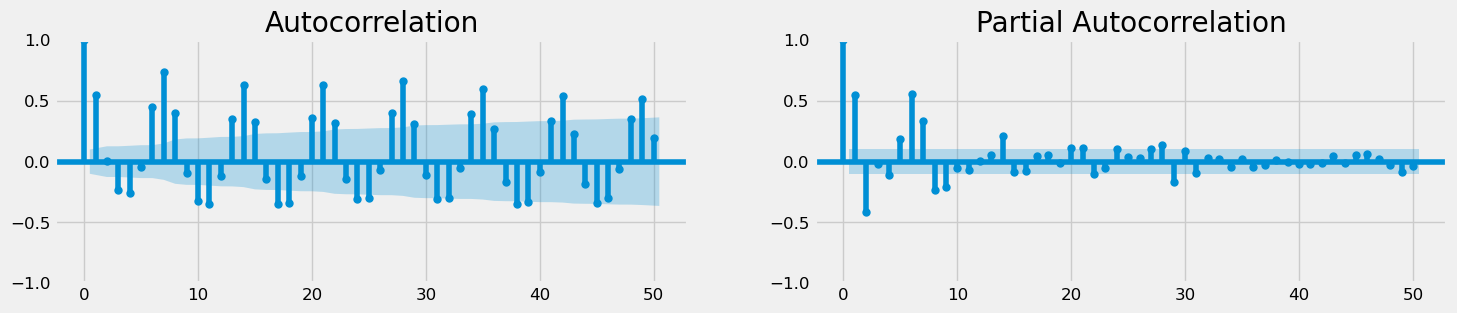

In [26]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 50 gecikməyə qədər ACF və PACF hesablanır - hazırda şərhə alınıb
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# ACF və PACF qrafiklərini çəkmək üçün 1x2 ölçülü subplot yaradırıq
fig, axes = plt.subplots(1, 2, figsize=(16, 3), dpi=100)

# Məlumatın ACF qrafiki çəkilir, 50 gecikməyə qədər
# tolist() metodu, Pandas DataFrame və ya Series-dən bir Python listi yaratmaq üçün istifadə olunur
plot_acf(df['count'].tolist(), lags=50, ax=axes[0])

# Məlumatın PACF qrafiki çəkilir, 50 gecikməyə qədər
# tolist() metodu, Pandas DataFrame və ya Series-dən bir Python listi yaratmaq üçün istifadə olunur
plot_pacf(df['count'].tolist(), lags=50, ax=axes[1])
plt.show()

## ARIMA MODEL

In [27]:
df_ar = copy.deepcopy(df)
df_ar

,date,count,lang,page,rank,month,title
0,2015-01-01,1414.0,en,Machine_learning,8708,2015-January,Machine_learning
1,2015-01-02,1920.0,en,Machine_learning,8708,2015-January,Machine_learning
2,2015-01-03,1338.0,en,Machine_learning,8708,2015-January,Machine_learning
3,2015-01-04,1404.0,en,Machine_learning,8708,2015-January,Machine_learning
4,2015-01-05,2264.0,en,Machine_learning,8708,2015-January,Machine_learning
...,...,...,...,...,...,...,...
379,2016-01-16,1644.0,en,Machine_learning,8708,2016-January,Machine_learning
380,2016-01-17,1836.0,en,Machine_learning,8708,2016-January,Machine_learning
381,2016-01-18,2983.0,en,Machine_learning,8708,2016-January,Machine_learning
382,2016-01-19,3389.0,en,Machine_learning,8708,2016-January,Machine_learning


### Addım 1: Stasionarlıq yoxlanışı və düzəldilməsi
- Zaman seriyası stasionar deyilsə, stasionarlıq üçün fərqləndirmə tətbiq edə bilərik (d parametri ilə). Önəmli olan verinin trend və seasonality kimi qeyri-stasionar komponentlərdən təmizlənməsi.

In [28]:
from statsmodels.tsa.stattools import adfuller  # ADF testini yerinə yetirmək üçün lazımlı funksiyanı yükləyir

# ADF Test
result = adfuller(df_ar['count'].values, autolag='AIC')  # 'value' sütununu istifadə edərək ADF testini yerinə yetirir
print(f'ADF Statistic: {result[0]}')  # ADF statistik dəyərini çap edir
print(f'p-value: {result[1]}')  # p-dəyərini çap edir
for key, value in result[4].items():  # Tənqidi dəyərləri çap etmək üçün döngü
    print('Critial Values:')  # 'Critial Values' başlığını çap edir
    print(f'{key}, {value}')  # Tənqidi dəyəri və onun müvafiq dəyərini çap edir

ADF Statistic: -3.295191241403254
p-value: 0.015094799283876859
Critial Values:
1%, -3.4482453822848496
Critial Values:
5%, -2.8694261442901396
Critial Values:
10%, -2.5709711770439507


- Əgər seriya stasionar deyilsə, birinci fərqləndirmə tətbiq edərək stasionarlaşdırırıq:

In [29]:
# df_ar['count'] = df_ar['count'].diff().dropna() #ehtiyac deyil stasionardir

### Addım 2: ARIMA model parametrlərinin təyin edilməsi
- ARIMA modelində p, d və q parametrlərini təyin etmək üçün ACF və PACF qrafiklərindən istifadə edə bilərik:

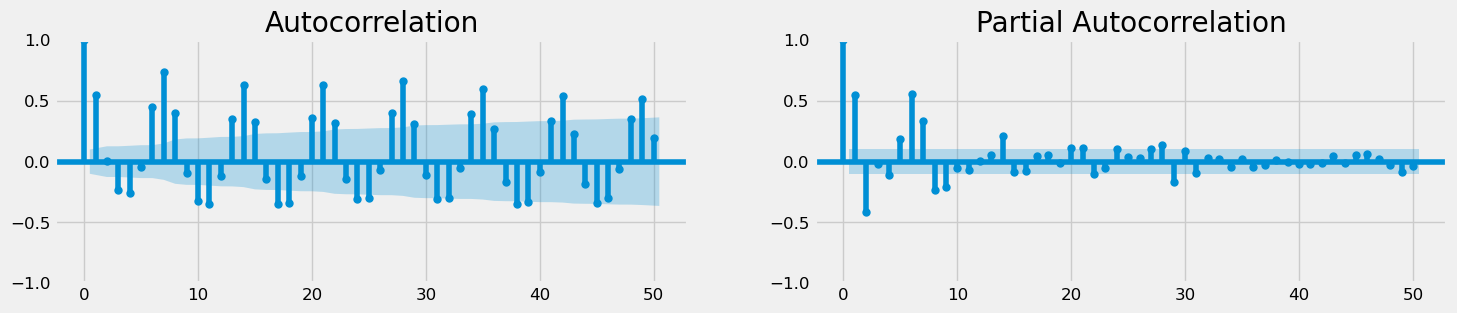

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ACF və PACF qrafiklərini yarat
fig, axes = plt.subplots(1, 2, figsize=(16, 3))
plot_acf(df_ar['count'].dropna(), lags=50, ax=axes[0])
plot_pacf(df_ar['count'].dropna(), lags=50, ax=axes[1])
plt.show()

In [31]:
# p=1, d=0, q=2  teyin etdim

### Addım 3: ARIMA modelinin qurulması
- ARIMA modelini qurub öyrədək:

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA modelini qur (p, d, q dəyərlərini ACF və PACF-dən götür)
model = ARIMA(df_ar['count'], order=(3, 1, 3))  # p, d, q real dəyərlərlə əvəz edin
model_fit = model.fit()

# Modelin xülasəsini göstər
model_fit.summary()


C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  count   No. Observations:                  384
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2857.738
Date:                Wed, 23 Oct 2024   AIC                           5729.477
Time:                        12:00:58   BIC                           5757.113
Sample:                             0   HQIC                          5740.440
                                - 384                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4062      0.105     13.353      0.000       1.200       1.613
ar.L2         -1.2034      0.130     -9.225      0.000      -1.459      -0.948
ar.L3          0.1659      0.104      1.589      0.112      -0.039       0.370
ma.L1         -2.0247      0.074    -27.330      0.000      -2.170      -1.880
ma.L2          1.9246      0.101     19.067      0.000       1.727       2.122
ma.L3         -0.7820      0.068    -11.514      0.000      -0.915      -0.649
sigma2      2.374e+05   1.46e+04     16.285      0.000    2.09e+05    2.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):               304.54
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.98
Prob(H) (two-sided):                  0.88   Kurtosis:                         6.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Addım 4: Növbəti 30 gün üçün proqnoz
- Model öyrədildikdən sonra növbəti 30 gün üçün proqnoz verə bilərsiniz:

In [33]:
# 30 gün proqnoz ver
forecast_ar = model_fit.forecast(steps=30)

# Proqnozu göstərin
forecast_ar


# 30 gün üçün proqnoz və etibar intervalları
forecast_ar = model_fit.forecast(steps=30, alpha=0.05)

# 30 gün üçün proqnoz və etibar intervalları
forecast_results = model_fit.get_forecast(steps=30)  # Proqnoz və etibar intervalını əldə et
# forecast_ar = forecast_results.predicted_mean  # Proqnoz dəyərləri
conf_int = forecast_results.conf_int(alpha=0.05)  # 95% etibar intervalları

# Mövcud data çərçivəsinin son tarixini götürək
last_date = df_ar['date'].iloc[-1]

# Növbəti 30 günün tarixlərini yaratmaq
date_range = pd.date_range(start=last_date, periods=30, freq='D')

# Nəticələri DataFrame-ə yazırıq
forecast_ar = pd.DataFrame({
    'date': date_range,
    'forecast': forecast_ar,
    'lower CI': conf_int.iloc[:, 0],  # Aşağı etibar limiti
    'upper CI': conf_int.iloc[:, 1]   # Yuxarı etibar limiti
})

# Proqnozu və etibar intervallarını göstərin
forecast_ar

,date,forecast,lower CI,upper CI
384,2016-01-20,2924.250955,1969.301365,3879.200546
385,2016-01-21,2286.345539,1264.277301,3308.413778
386,2016-01-22,1991.722599,945.740585,3037.704613
387,2016-01-23,2239.811668,1183.783335,3295.840001
388,2016-01-24,2837.414670,1775.701245,3899.128095
389,2016-01-25,3330.327000,2260.819700,4399.834301
390,2016-01-26,3345.433468,2259.895047,4430.971890
391,2016-01-27,2872.620181,1761.500902,3983.739459
392,2016-01-28,2271.340209,1133.828467,3408.851952
393,2016-01-29,1997.331407,842.249164,3152.413650


### Forecast vs Actual vs Confidence Interval

In [34]:
actual = df_ar[['date', 'count']].set_index('date')
forecast_ar_plot = forecast_ar[['date', 'forecast']].set_index('date')
lower_ci = forecast_ar[['date','lower CI']].set_index('date')
upper_ci = forecast_ar[['date','upper CI']].set_index('date')

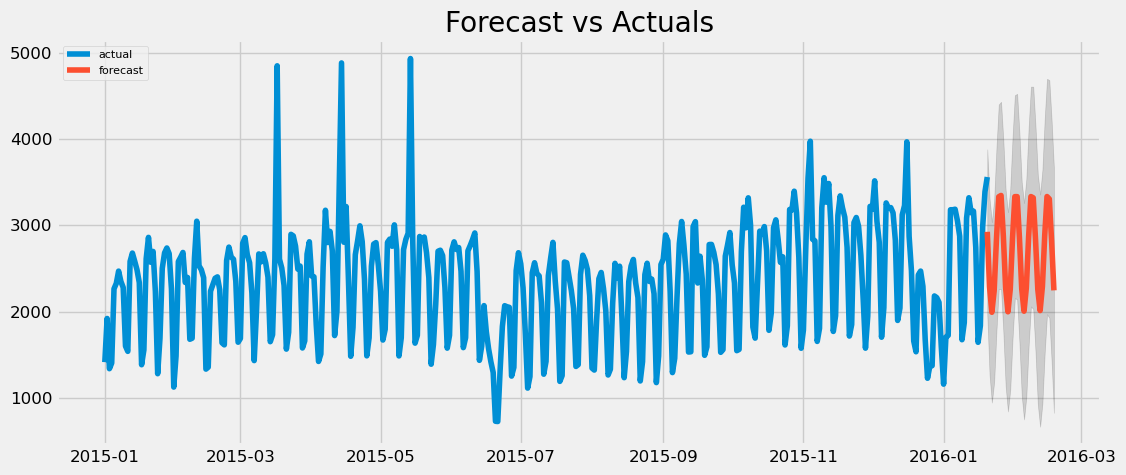

In [35]:
# Qrafik çəkir
plt.figure(figsize=(12,5), dpi=100)  # Şəkilin ölçüsünü və keyfiyyətini təyin edir
plt.plot(actual, label='actual')  # Train datasını qrafikdə çəkir
plt.plot(forecast_ar_plot, label='forecast')  # Real test dəyərlərini qrafikdə göstərir
plt.fill_between(lower_ci.index, lower_ci['lower CI'], upper_ci['upper CI'], 
                 color='k', alpha=.15)  # Etibar intervalını qrafikdə kölgə ilə göstərir
plt.title('Forecast vs Actuals')  # Qrafikin başlığını təyin edir
plt.legend(loc='upper left', fontsize=8)  # Əfsanəni yuxarı sol küncdə göstərir
plt.show()  # Qrafiki göstərir

### Metrics

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,\
                                                                                        root_mean_squared_error

# Real və proqnozlaşdırılmış dəyərlər
# y_true = df[df.date>='2015-01-20']['count'][:30] 
y_true = df['count'][-30:]  # Son 30 günün real dəyərləri (məsələn, data sırasından çıxarılır)
y_pred = forecast_ar['forecast']  # Son 30 günün proqnozlaşdırılmış dəyərləri (ARIMA modelinin nəticələri)


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): -0.7338151980240568
Mean Absolute Error (MAE): 845.9900149994397
Mean Absolute Percentage Error (MAPE): 0.439606068221071
Mean Squared Error (MSE): 967798.268782283
Root Mean Squared Error (RMSE): 983.7673855044611


## PMDARIMA

In [37]:
df_pmdar = copy.deepcopy(df.set_index('date')[['count']])
df_pmdar

,count
date,
2015-01-01,1414.0
2015-01-02,1920.0
2015-01-03,1338.0
2015-01-04,1404.0
2015-01-05,2264.0
...,...
2016-01-16,1644.0
2016-01-17,1836.0
2016-01-18,2983.0


In [38]:
import pmdarima as pm
model = pm.auto_arima(df_pmdar,
                      start_p=1, # AR (AutoRegressive) komponenti üçün başlanğıc p dəyəri (başlanğıc gecikmə dərəcəsi)
                      start_q=1, # MA (Moving Average) komponenti üçün başlanğıc q dəyəri (başlanğıc gecikmə dərəcəsi)
                      test='adf', # d dəyərini təyin etmək üçün ADF (Augmented Dickey-Fuller) testindən istifadə edir
                      max_p=3,       # p üçün maksimum dəyər (AutoRegressive komponentin maksimum gecikmə dərəcəsi)
                      max_q=3,       # q üçün maksimum dəyər (Moving Average komponentin maksimum gecikmə dərəcəsi)
#                m=1,# Seriyanın tezliyi (1: hər müşahidə bir addım intervalında, mövsümsüz seriya üçün istifadə olunur)
                      d=None,        # d dəyəri (inteqrasiya dərəcəsi) avtomatik təyin olunur
                      seasonal=True,# Mövsümi komponentin nəzərə alınmaması üçün (mövsümsüz model)
                      start_P=0,     # Mövsümi AutoRegressive komponenti (SAR) üçün başlanğıc P dəyəri (sezon p)
                      D=0,           # Mövsümi inteqrasiya komponenti (mövsümi dərəcə) üçün D dəyəri (sezon d)
                      trace=True,    # Modelin təlim prosesi zamanı addımları izlə (parametrləri göstər)
                      error_action='ignore', # Xəta baş verərsə, onu gözardı et (modelin durmaması üçün)
                      suppress_warnings=True, # Xəbərdarlıqları göstərməmək üçün
                      stepwise=True # Addım-addım axtarış alqoritmindən istifadə et, modeli daha sürətli öyrənmək üçün
                     )

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6005.076, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6020.984, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6019.066, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6012.904, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6019.016, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5844.700, Time=1.75 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5969.844, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5841.390, Time=2.57 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5960.320, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5791.326, Time=3.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5733.860, Time=2.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.32 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5733.2

### model.params pmdarima ilə qurulmuş ARIMA modelinin parametrləri

In [39]:
model.params

<bound method ARIMA.params of ARIMA(order=(3, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

### Forecast vs Confidence Inteval vs Plot

C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


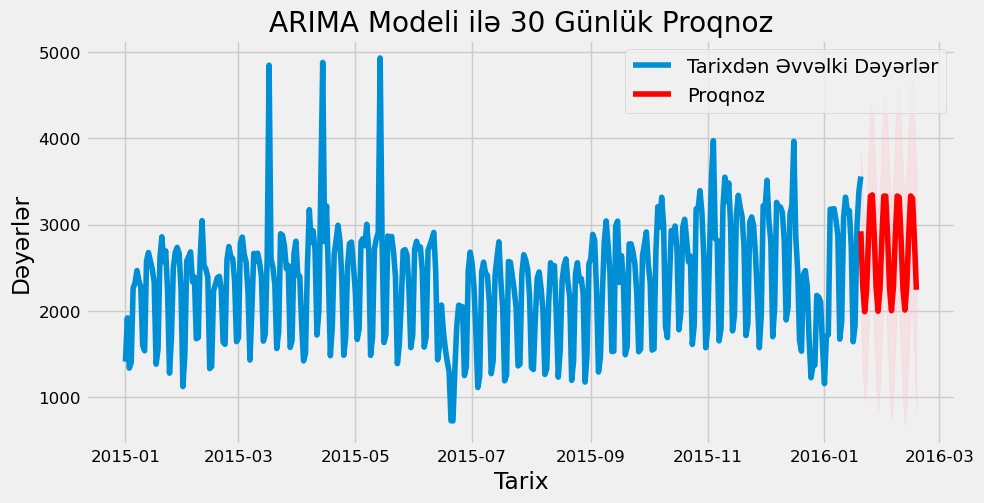

In [40]:
forecast_pmdar, conf_int = model.predict(n_periods=30, return_conf_int=True)

# 7. Proqnoz tarixlərini yaradın (proqnozun son tarixini əlavə edərək)
forecast_dates = pd.date_range(start=df_pmdar.index[-1], periods=30, freq='D', name='date')

# 8. Proqnozları və etibar intervallarını DataFrame olaraq saxlayın
forecast_pmdar = pd.DataFrame({'forecast': forecast_pmdar.values, 'Lower Bound': conf_int[:, 0], 
                            'Upper Bound': conf_int[:, 1]}, index=forecast_dates)

# 9. Nəticələri göstərin
plt.figure(figsize=(10,5))
plt.plot(df_pmdar, label='Tarixdən Əvvəlki Dəyərlər')
plt.plot(forecast_pmdar['forecast'], label='Proqnoz', color='red')
plt.fill_between(forecast_pmdar.index, forecast_pmdar['Lower Bound'], forecast_pmdar['Upper Bound'], color='pink', 
                                                                                                         alpha=0.3)
plt.title('ARIMA Modeli ilə 30 Günlük Proqnoz')
plt.xlabel('Tarix')
plt.ylabel('Dəyərlər')
plt.legend()

In [41]:
forecast_pmdar

,forecast,Lower Bound,Upper Bound
date,,,
2016-01-20,2924.250955,1969.301365,3879.200546
2016-01-21,2286.345539,1264.277301,3308.413778
2016-01-22,1991.722599,945.740585,3037.704613
2016-01-23,2239.811668,1183.783335,3295.840001
2016-01-24,2837.414670,1775.701245,3899.128095
2016-01-25,3330.327000,2260.819700,4399.834301
2016-01-26,3345.433468,2259.895047,4430.971890
2016-01-27,2872.620181,1761.500902,3983.739459
2016-01-28,2271.340209,1133.828467,3408.851952


### Modelin diagnostik qrafikləri

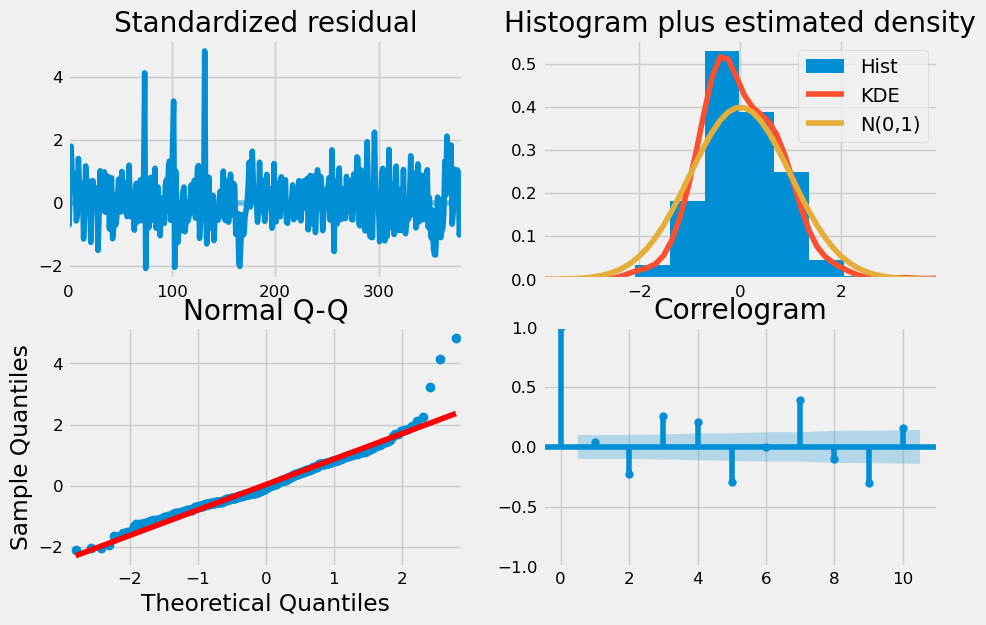

In [42]:
# Modelin diagnostik qrafikləri çıxarılır
model.plot_diagnostics(figsize=(10, 6.5))  

# Qrafikləri ekranda göstərir
plt.show() 

### Metrcis

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error



# Əsl dəyərləri götürmək (məsələn, df-də son 30 gün)
y_true = df_pmdar['count'][-30:]  # Burada 'value' əsl dəyərləri göstərən sütundur
# 30 günlük proqnoz verin
y_pred = forecast_pmdar['forecast']


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): -0.7338151980240568
Mean Absolute Error (MAE): 845.9900149994397
Mean Absolute Percentage Error (MAPE): 0.439606068221071
Mean Squared Error (MSE): 967798.268782283
Root Mean Squared Error (RMSE): 983.7673855044611


## Time Series Modeling with Prophet

In [44]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Selection Feature

In [45]:
df_prpht = copy.deepcopy(df)
df_prpht = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_prpht

,ds,y
0,2015-01-01,1414.0
1,2015-01-02,1920.0
2,2015-01-03,1338.0
3,2015-01-04,1404.0
4,2015-01-05,2264.0
...,...,...
379,2016-01-16,1644.0
380,2016-01-17,1836.0
381,2016-01-18,2983.0
382,2016-01-19,3389.0


### Creat Model Prophet

In [46]:
from prophet import Prophet

model = Prophet(interval_width=0.95)
model.fit(df_prpht)

12:01:53 - cmdstanpy - INFO - Chain [1] start processing
12:01:54 - cmdstanpy - INFO - Chain [1] done processing


### Forecast

In [47]:
future = model.make_future_dataframe (periods = 30, freq='D')
forecast_prht = model.predict(future)
forecast_prht[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']]

,ds,yhat,trend,yhat_lower,yhat_upper
0,2015-01-01,2468.748604,2165.670792,1786.235930,3137.276757
1,2015-01-02,2153.048510,2168.356510,1443.455948,2876.148466
2,2015-01-03,1321.366604,2171.042228,616.075717,1999.261277
3,2015-01-04,1462.981441,2173.727946,744.720815,2174.788617
4,2015-01-05,2479.064416,2176.413664,1782.101667,3178.140308
...,...,...,...,...,...
409,2016-02-15,2966.934088,2664.283336,2254.347418,3697.017016
410,2016-02-16,3205.477934,2665.960694,2537.495366,3907.681454
411,2016-02-17,3098.122378,2667.638052,2402.759078,3863.580989
412,2016-02-18,2972.393222,2669.315411,2201.627948,3664.420924


In [48]:
forecast_prht[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']][-30:].head()

,ds,yhat,trend,yhat_lower,yhat_upper
384,2016-01-21,2925.427192,2622.349380,2188.227616,3686.320075
385,2016-01-22,2608.718739,2624.026739,1889.929236,3276.413212
386,2016-01-23,1776.028473,2625.704097,1064.972056,2458.304102
387,2016-01-24,1916.634950,2627.381455,1245.610455,2601.023587
388,2016-01-25,2931.709565,2629.058813,2192.694370,3682.131035


### Plotting  Forecast

<Figure size 1800x600 with 0 Axes>

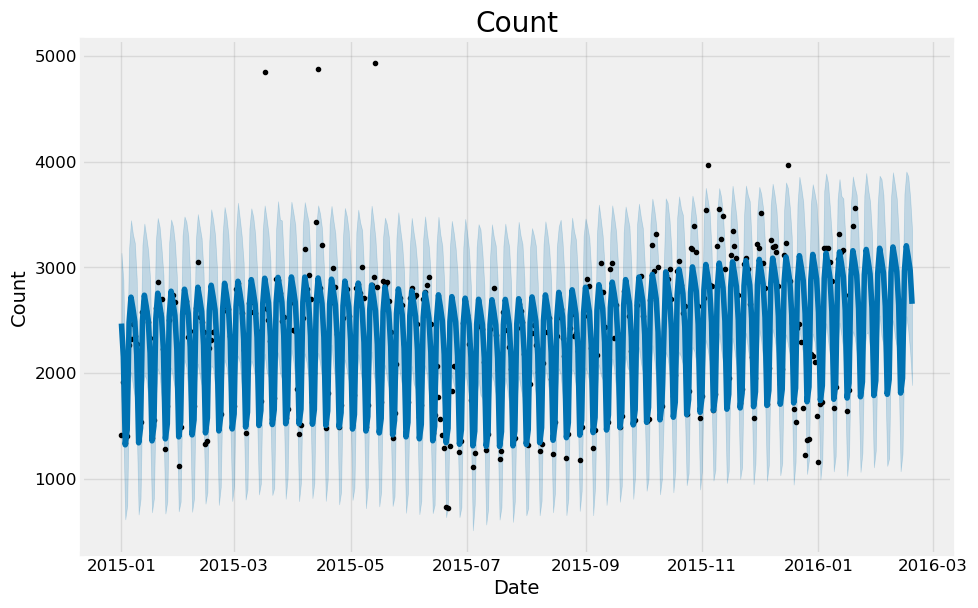

In [49]:
#plotting furniture forecast
plt.figure(figsize=(18, 6))
model.plot(forecast_prht, xlabel = 'Date', ylabel = 'Count')
plt.title('Count')
plt.show()

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


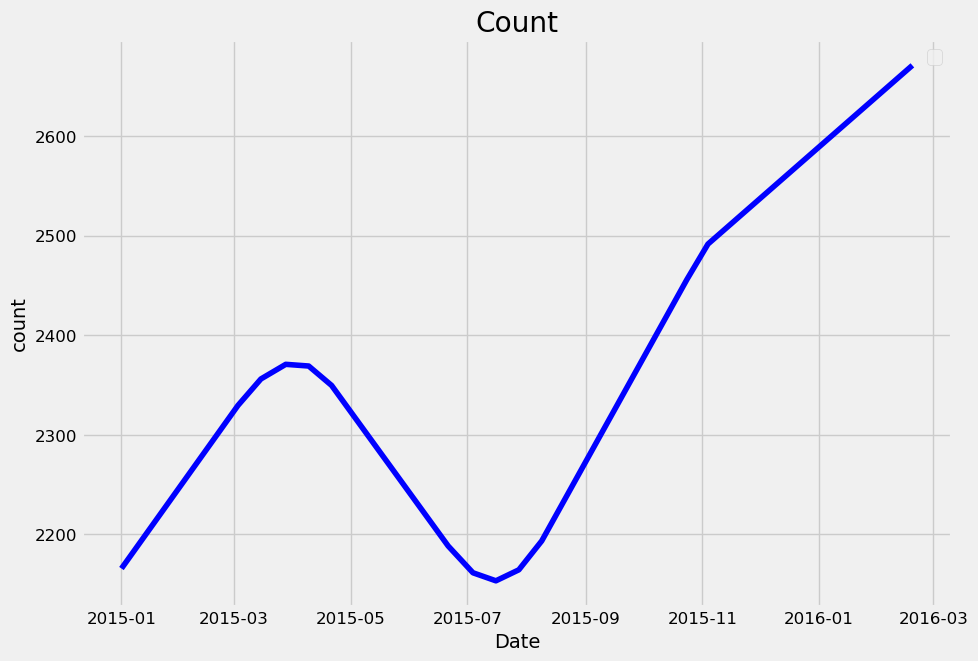

In [50]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_prht['ds'], forecast_prht['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

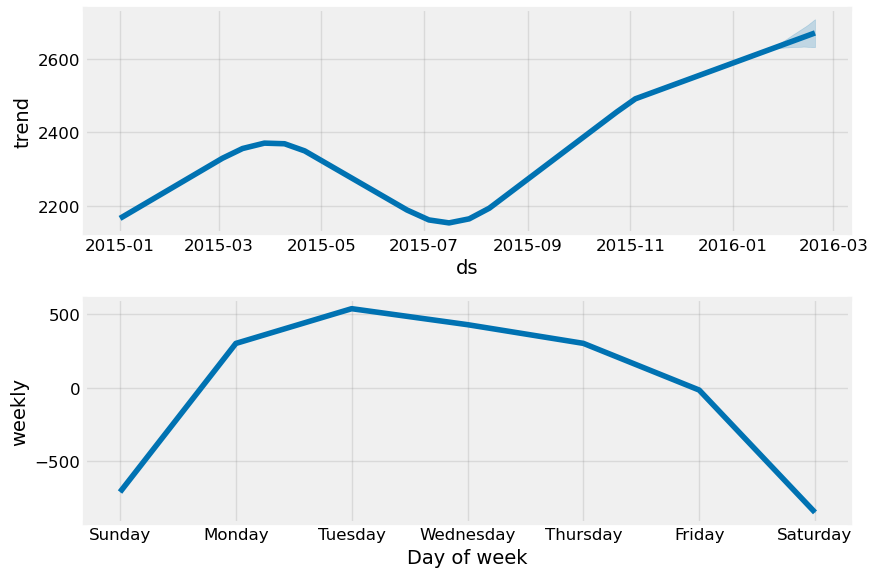

In [51]:
model.plot_components(forecast_prht)
plt.show()

### Modelin Diagnostik qrafikləri çıxarılır

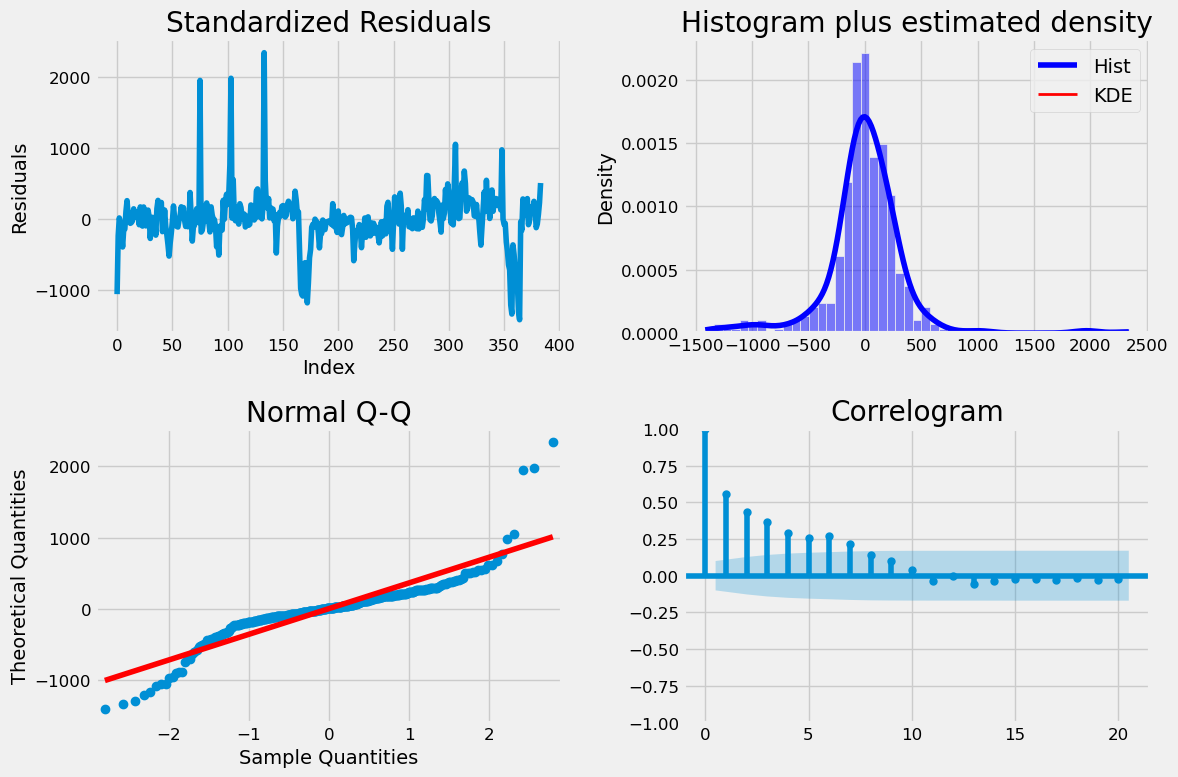

In [52]:
# Qalıqları hesablayın
residuals = df_prpht['y'] - forecast_prht['yhat'][:len(df_prpht)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### Proqnozdan sonra metrikləri əldə etmək:

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_prpht['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_prht['yhat'][:len(df_prpht['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.6986658318601799
Mean Absolute Error (MAE): 220.1048880641873
Mean Absolute Percentage Error (MAPE): 0.10306065864494394
Mean Squared Error (MSE): 130594.09716625644
Root Mean Squared Error (RMSE): 361.3780529670506


### Difference show with Real and Pred

In [54]:
pd.DataFrame({'date': df_prpht.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

,date,real,frcst,diff
0,2015-01-01,1414.0,2468.748604,-1054.748604
1,2015-01-02,1920.0,2153.048510,-233.048510
2,2015-01-03,1338.0,1321.366604,16.633396
3,2015-01-04,1404.0,1462.981441,-58.981441
4,2015-01-05,2264.0,2479.064416,-215.064416
...,...,...,...,...
379,2016-01-16,1644.0,1764.286966,-120.286966
380,2016-01-17,1836.0,1904.893442,-68.893442
381,2016-01-18,2983.0,2919.968057,63.031943
382,2016-01-19,3389.0,3158.511904,230.488096


### Time Series Modeling with Prophet vs ParameterGrid

In [55]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Selection Feature

In [56]:
df_prpht = copy.deepcopy(df)
df_prpht = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_prpht

,ds,y
0,2015-01-01,1414.0
1,2015-01-02,1920.0
2,2015-01-03,1338.0
3,2015-01-04,1404.0
4,2015-01-05,2264.0
...,...,...
379,2016-01-16,1644.0
380,2016-01-17,1836.0
381,2016-01-18,2983.0
382,2016-01-19,3389.0


### ParameterGrid

In [57]:
from sklearn.model_selection import ParameterGrid

parameters = {
            "changepoint_prior_scale" : [0.1, 0.2],
            "n_changepoints" : [1, 5],
            "holidays_prior_scale" : [0.1, 0.2],
            "seasonality_mode" : ['multiplicative', 'additive']
            }

parameter_grid = ParameterGrid(parameters)

In [58]:
# Nəticələrin saxlanması üçün boş siyahı
parameter_list = []

# Model üçün təlim datanızın adı 'model_df' olmalıdır
# model_df DataFrame içində 'ds' sütunu (tarixlər) və 'y' sütunu (məqsəd dəyişəni) olmalıdır

for p in parameter_grid:
    print("Testing parameters:", p)
    
    # Prophet modeli qurmaq
    model = Prophet(
                    changepoint_prior_scale=p['changepoint_prior_scale'], 
                    n_changepoints=p['n_changepoints'],
                    holidays_prior_scale=p['holidays_prior_scale'], 
                    seasonality_mode=p['seasonality_mode'], 
                    interval_width=0.95
                    )
    
    # Modeli öyrətmək
    model.fit(df_prpht)
    
    # Gələcək üçün dataframe yaratmaq (100 gün irəliyə)
    future = model.make_future_dataframe(periods=300, freq='D')
    
    # Proqnoz yaratmaq
    forecast = model.predict(future)
    
    # Proqnozlanmış dəyərlərdən yalnız 'ds' və 'yhat' sütunlarını seçirik
    predicted = forecast[['ds', 'yhat']]
    
    # Əsl dəyərlər 'model_df' içində olmalıdır
    actual = df_prpht
    
    # MPE (Mean Percentage Error) hesablanması
    mpe = np.mean((predicted['yhat'].values[:len(actual['y'].values)] - actual['y'].values) / actual['y'].values)
    
    print("MPE:", mpe)
    
    # Hər parametri və onun MPE dəyərini siyahıya əlavə etmək
    parameter_list.append([mpe, p])

# Nəticələr siyahısı - hər parametr dəsti üçün MPE və parametrlər çap olunur
print(parameter_list)

Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


12:02:09 - cmdstanpy - INFO - Chain [1] start processing
12:02:09 - cmdstanpy - INFO - Chain [1] done processing
12:02:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:02:09 - cmdstanpy - INFO - Chain [1] start processing
12:02:09 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.02958566284879588
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


12:02:11 - cmdstanpy - INFO - Chain [1] start processing
12:02:11 - cmdstanpy - INFO - Chain [1] done processing
12:02:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:02:11 - cmdstanpy - INFO - Chain [1] start processing
12:02:11 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.02960164206395634
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


12:02:13 - cmdstanpy - INFO - Chain [1] start processing
12:02:13 - cmdstanpy - INFO - Chain [1] done processing
12:02:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:02:13 - cmdstanpy - INFO - Chain [1] start processing
12:02:13 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.023141363833519234
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


12:02:15 - cmdstanpy - INFO - Chain [1] start processing
12:02:15 - cmdstanpy - INFO - Chain [1] done processing
12:02:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:02:15 - cmdstanpy - INFO - Chain [1] start processing
12:02:15 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.022455058715191222
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


12:02:16 - cmdstanpy - INFO - Chain [1] start processing
12:02:16 - cmdstanpy - INFO - Chain [1] done processing
12:02:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:02:17 - cmdstanpy - INFO - Chain [1] start processing
12:02:17 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.02958566284879588
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


12:02:18 - cmdstanpy - INFO - Chain [1] start processing
12:02:19 - cmdstanpy - INFO - Chain [1] done processing
12:02:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:02:19 - cmdstanpy - INFO - Chain [1] start processing
12:02:19 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.02960164206395634
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


12:02:20 - cmdstanpy - INFO - Chain [1] start processing
12:02:20 - cmdstanpy - INFO - Chain [1] done processing
12:02:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:02:20 - cmdstanpy - INFO - Chain [1] start processing
12:02:21 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.023141363833519234
Testing parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


12:02:22 - cmdstanpy - INFO - Chain [1] start processing
12:02:22 - cmdstanpy - INFO - Chain [1] done processing
12:02:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:02:23 - cmdstanpy - INFO - Chain [1] start processing
12:02:23 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.022455058715191222
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


12:02:24 - cmdstanpy - INFO - Chain [1] start processing
12:02:24 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.029586201253204224
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


12:02:25 - cmdstanpy - INFO - Chain [1] start processing
12:02:26 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.029587500439381863
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


12:02:27 - cmdstanpy - INFO - Chain [1] start processing
12:02:27 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.022092315948247246
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


12:02:28 - cmdstanpy - INFO - Chain [1] start processing
12:02:29 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.021152196483307965
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}


12:02:30 - cmdstanpy - INFO - Chain [1] start processing
12:02:30 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.029586201253204224
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive'}


12:02:31 - cmdstanpy - INFO - Chain [1] start processing
12:02:31 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.029587500439381863
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}


12:02:33 - cmdstanpy - INFO - Chain [1] start processing
12:02:33 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.022092315948247246
Testing parameters: {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


12:02:34 - cmdstanpy - INFO - Chain [1] start processing
12:02:34 - cmdstanpy - INFO - Chain [1] done processing


MPE: 0.021152196483307965
[[0.02958566284879588, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}], [0.02960164206395634, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 1, 'seasonality_mode': 'additive'}], [0.023141363833519234, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'multiplicative'}], [0.022455058715191222, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}], [0.02958566284879588, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'multiplicative'}], [0.02960164206395634, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 1, 'seasonality_mode': 'additive'}], [0.023141363833519234, {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 5, 'seasonality_

In [59]:
parameters_df = pd.DataFrame(parameter_list, columns=['MPE', 'P'])
parameters_df

,MPE,P
0,0.029586,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
1,0.029602,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
2,0.023141,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
3,0.022455,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
4,0.029586,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
5,0.029602,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
6,0.023141,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
7,0.022455,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
8,0.029586,"{'changepoint_prior_scale': 0.2, 'holidays_pri..."
9,0.029588,"{'changepoint_prior_scale': 0.2, 'holidays_pri..."


In [60]:
parameters_df = parameters_df.sort_values(by='MPE')
parameters_df

,MPE,P
11,0.021152,"{'changepoint_prior_scale': 0.2, 'holidays_pri..."
15,0.021152,"{'changepoint_prior_scale': 0.2, 'holidays_pri..."
10,0.022092,"{'changepoint_prior_scale': 0.2, 'holidays_pri..."
14,0.022092,"{'changepoint_prior_scale': 0.2, 'holidays_pri..."
3,0.022455,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
7,0.022455,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
2,0.023141,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
6,0.023141,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
0,0.029586,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
4,0.029586,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."


In [61]:
print("Lowest MPE: ", parameters_df.iloc[0, 0]) 
print("Parameters: ", parameters_df.iloc[0, 1])

Lowest MPE:  0.021152196483307965
Parameters:  {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 5, 'seasonality_mode': 'additive'}


### Creat Model Prophet with Best Parameters

In [62]:
from prophet import Prophet

model = Prophet(changepoint_prior_scale = 0.2,
                holidays_prior_scale = 0.1,
                n_changepoints = 5,
                seasonality_mode = 'additive',
                interval_width =0.95)
model.fit(df_prpht)

12:02:36 - cmdstanpy - INFO - Chain [1] start processing
12:02:36 - cmdstanpy - INFO - Chain [1] done processing


### Forecast

In [63]:
future = model.make_future_dataframe (periods = 30, freq='D')
forecast_prht = model.predict(future)
forecast_prht[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']]

,ds,yhat,trend,yhat_lower,yhat_upper
0,2015-01-01,2417.507590,2115.724428,1777.114005,3073.069167
1,2015-01-02,2103.006046,2119.201796,1442.853065,2766.131892
2,2015-01-03,1272.532686,2122.679164,627.642725,1906.659403
3,2015-01-04,1415.055030,2126.156533,743.676097,2080.803773
4,2015-01-05,2434.214834,2129.633901,1805.554471,3061.359701
...,...,...,...,...,...
409,2016-02-15,2656.016593,2351.435660,1966.382166,3360.176773
410,2016-02-16,2888.096900,2348.228117,2204.022061,3574.276652
411,2016-02-17,2776.231428,2345.020574,2037.933349,3485.242698
412,2016-02-18,2643.596193,2341.813031,1989.257390,3335.140711


In [64]:
forecast_prht[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']][-30:].head()

,ds,yhat,trend,yhat_lower,yhat_upper
384,2016-01-21,2733.407394,2431.624232,2076.539028,3389.282845
385,2016-01-22,2412.220939,2428.416689,1757.860316,3017.950327
386,2016-01-23,1575.062668,2425.209146,838.809112,2253.470082
387,2016-01-24,1710.900101,2422.001604,1025.810958,2403.750869
388,2016-01-25,2723.374994,2418.794061,1985.928172,3351.293171


### Plotting  Forecast

<Figure size 1800x600 with 0 Axes>

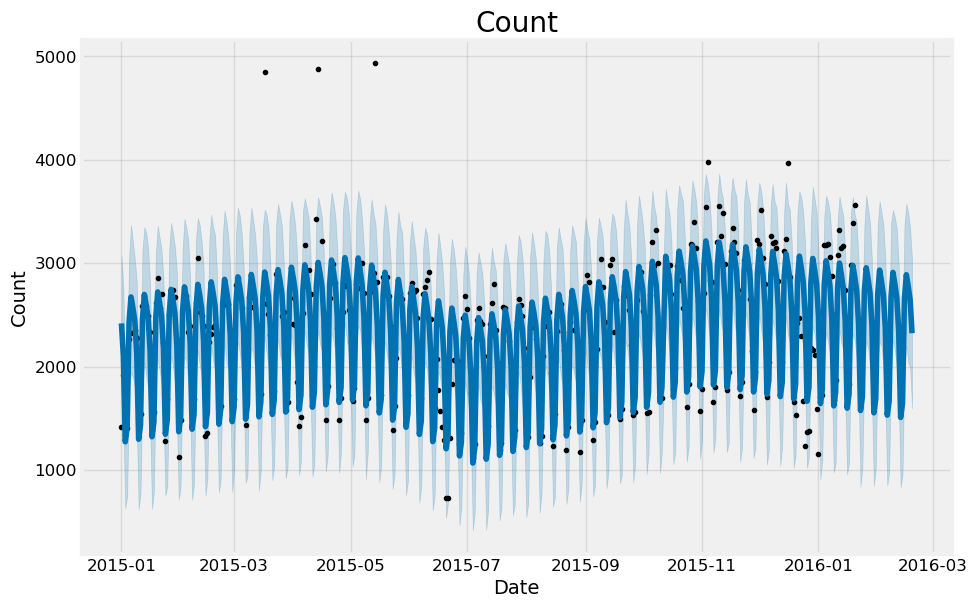

In [65]:
#plotting furniture forecast
plt.figure(figsize=(18, 6))
model.plot(forecast_prht, xlabel = 'Date', ylabel = 'Count')
plt.title('Count')
plt.show()

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


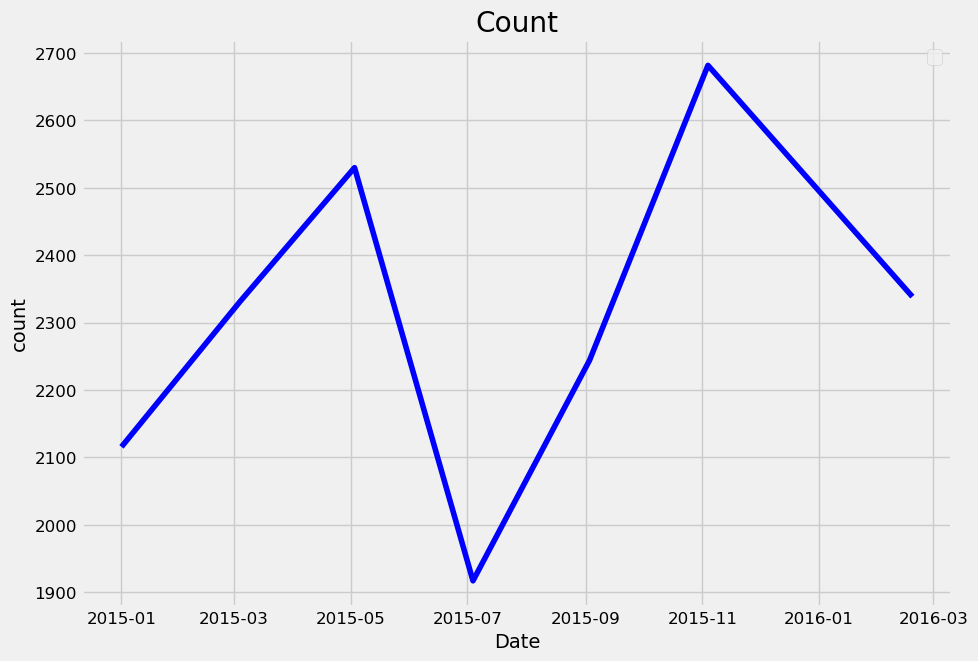

In [66]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_prht['ds'], forecast_prht['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

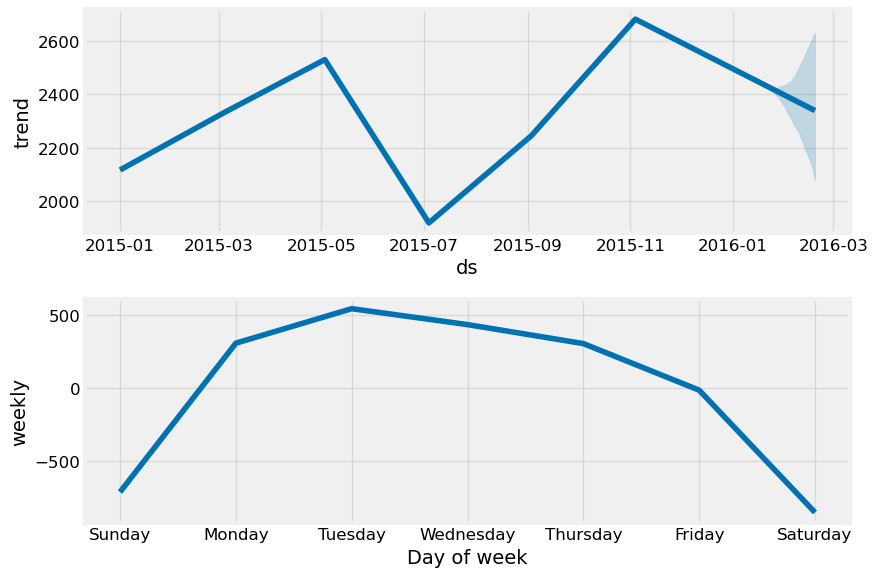

In [67]:
model.plot_components(forecast_prht)
plt.show()

### Modelin Diagnostik qrafikləri çıxarılır

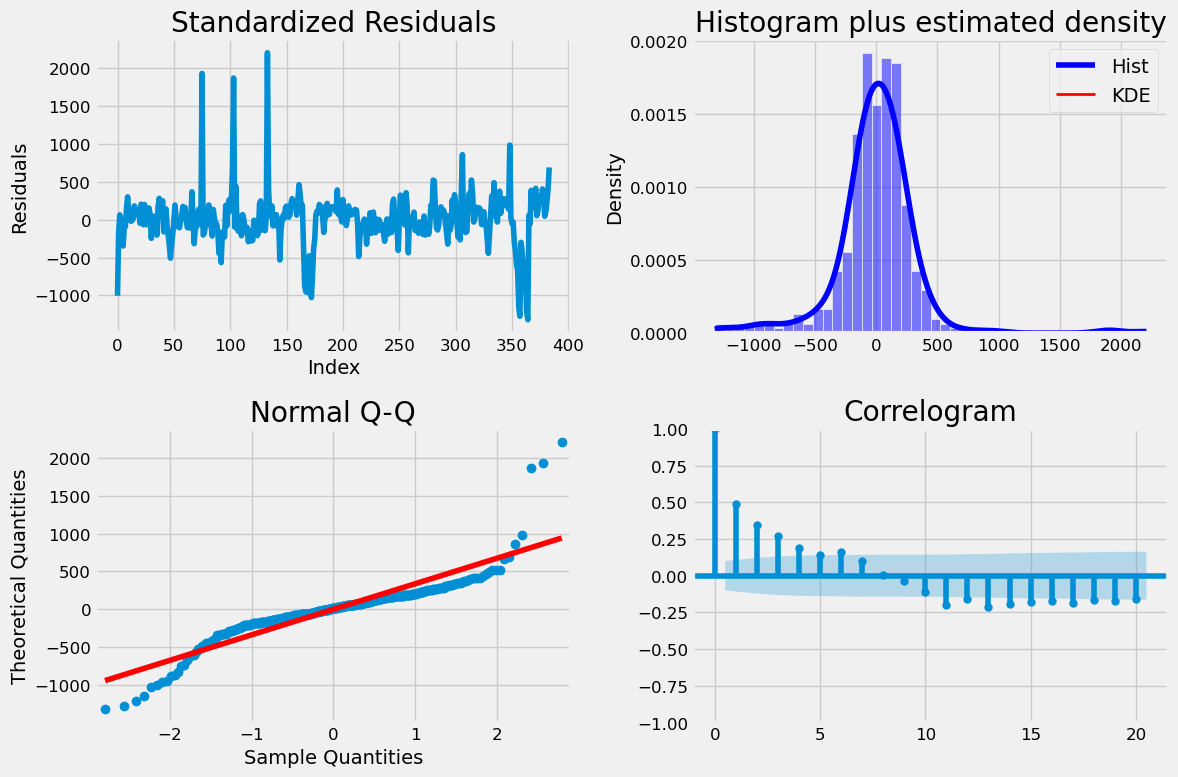

In [68]:
# Qalıqları hesablayın
residuals = df_prpht['y'] - forecast_prht['yhat'][:len(df_prpht)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### Proqnozdan sonra metrikləri əldə etmək:

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_prpht['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_prht['yhat'][:len(df_prpht['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.7377273754918632
Mean Absolute Error (MAE): 210.8848503712671
Mean Absolute Percentage Error (MAPE): 0.09770470812387712
Mean Squared Error (MSE): 113665.3596918754
Root Mean Squared Error (RMSE): 337.142936589031


### Difference show with Real and Pred

In [70]:
pd.DataFrame({'date': df_prpht.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

,date,real,frcst,diff
0,2015-01-01,1414.0,2417.507590,-1003.507590
1,2015-01-02,1920.0,2103.006046,-183.006046
2,2015-01-03,1338.0,1272.532686,65.467314
3,2015-01-04,1404.0,1415.055030,-11.055030
4,2015-01-05,2264.0,2434.214834,-170.214834
...,...,...,...,...
379,2016-01-16,1644.0,1597.515468,46.484532
380,2016-01-17,1836.0,1733.352901,102.647099
381,2016-01-18,2983.0,2745.827794,237.172206
382,2016-01-19,3389.0,2977.908101,411.091899


## Time Series Modeling with Prophet vs BayesianOptimization

In [71]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Selection Feature

In [72]:
df_byopt = copy.deepcopy(df)
df_byopt = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_byopt

,ds,y
0,2015-01-01,1414.0
1,2015-01-02,1920.0
2,2015-01-03,1338.0
3,2015-01-04,1404.0
4,2015-01-05,2264.0
...,...,...
379,2016-01-16,1644.0
380,2016-01-17,1836.0
381,2016-01-18,2983.0
382,2016-01-19,3389.0


### BayesianOptimization

In [73]:
# !pip install bayesian-optimization 

In [74]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from bayes_opt import BayesianOptimization

# Modelin optimizasiyası üçün funksiya təyin edir
def optimization_function(changepoint_prior_scale, n_changepoints, holidays_prior_scale, seasonality_mode):
    
    # seasonality_mode ədədi dəyərini müvafiq mətn formatına çevir
    if seasonality_mode == 0:
        seasonality_mode_str = 'additive'
    else:
        seasonality_mode_str = 'multiplicative'
    
    model = Prophet(changepoint_prior_scale=changepoint_prior_scale, 
                    n_changepoints=int(n_changepoints),
                    holidays_prior_scale=holidays_prior_scale,
                    seasonality_mode=seasonality_mode_str)  # Prophet mdelini qurur
    
    model.fit(df_byopt)  # Məlumatı modelə uyğunlaşdırır
    
    # Modeli cross-validation metodundan keçirir
    cross_val = cross_validation(model, horizon='30 days', parallel='processes')
    
    # Cross-validation nəticələrinə əsasən performans metriklərini hesablayır
    perf_m = performance_metrics(cross_val, rolling_window=1)

    # RMSE dəyərini qaytarır
    rmse = (perf_m['rmse'].values[0])
    
    return -rmse  # Bayes optimizasiyası minimallaşdırmağa çalışır, ona görə -RMSE qaytarır

# Optimizasiya parametrlərini təyin edin
parameters = {
            "changepoint_prior_scale" : [0.1, 0.2],
            "n_changepoints" : [1, 5],
            "holidays_prior_scale" : [0.1, 0.2],
#             "seasonality_mode" : ['multiplicative', 'additive']
            "seasonality_mode": (0, 1)  # 0: additive, 1: multiplicative
            }

# BayesianOptimization obyektini yaradın
optimizer = BayesianOptimization(
    f=optimization_function,  # Optimizasiya ediləcək funksiya
    pbounds=parameters,  # Parametrlərin aralığı
    random_state=42  # Təsadüfi vəziyyət
)

# Optimizasiyanı yerinə yetirin
optimizer.maximize(
    init_points=5,  # Başlanğıc nöqtələrinin sayı
    n_iter=20,  # İterasiya sayısı
)

# Nəticələri çap edin
print(optimizer.max)  # Ən yaxşı tapılan dəyəri göstərir

|   iter    |  target   | change... | holida... | n_chan... | season... |
-------------------------------------------------------------------------


12:02:52 - cmdstanpy - INFO - Chain [1] start processing
12:02:52 - cmdstanpy - INFO - Chain [1] done processing


| 1         | -515.9    | 0.1375    | 0.1951    | 3.928     | 0.5987    |


12:03:02 - cmdstanpy - INFO - Chain [1] start processing
12:03:02 - cmdstanpy - INFO - Chain [1] done processing
12:03:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:03:02 - cmdstanpy - INFO - Chain [1] start processing
12:03:02 - cmdstanpy - INFO - Chain [1] done processing


| 2         | -551.8    | 0.1156    | 0.1156    | 1.232     | 0.8662    |


12:03:09 - cmdstanpy - INFO - Chain [1] start processing
12:03:09 - cmdstanpy - INFO - Chain [1] done processing
12:03:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:03:09 - cmdstanpy - INFO - Chain [1] start processing
12:03:09 - cmdstanpy - INFO - Chain [1] done processing


| 3         | -558.8    | 0.1601    | 0.1708    | 1.082     | 0.9699    |


12:03:21 - cmdstanpy - INFO - Chain [1] start processing
12:03:21 - cmdstanpy - INFO - Chain [1] done processing


| 4         | -561.7    | 0.1832    | 0.1212    | 1.727     | 0.1834    |


12:03:32 - cmdstanpy - INFO - Chain [1] start processing
12:03:32 - cmdstanpy - INFO - Chain [1] done processing


| 5         | -544.8    | 0.1304    | 0.1525    | 2.728     | 0.2912    |


12:03:41 - cmdstanpy - INFO - Chain [1] start processing
12:03:41 - cmdstanpy - INFO - Chain [1] done processing


| 6         | -514.4    | 0.1       | 0.1758    | 3.925     | 0.1758    |


12:03:52 - cmdstanpy - INFO - Chain [1] start processing
12:03:52 - cmdstanpy - INFO - Chain [1] done processing
12:03:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:03:52 - cmdstanpy - INFO - Chain [1] start processing
12:03:53 - cmdstanpy - INFO - Chain [1] done processing


| 7         | -516.9    | 0.1       | 0.177     | 4.712     | 0.3079    |


12:04:04 - cmdstanpy - INFO - Chain [1] start processing
12:04:04 - cmdstanpy - INFO - Chain [1] done processing


| 8         | -518.5    | 0.2       | 0.1       | 5.0       | 1.0       |


12:04:14 - cmdstanpy - INFO - Chain [1] start processing
12:04:14 - cmdstanpy - INFO - Chain [1] done processing
12:04:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:04:14 - cmdstanpy - INFO - Chain [1] start processing
12:04:14 - cmdstanpy - INFO - Chain [1] done processing


| 9         | -516.9    | 0.1       | 0.1       | 4.374     | 1.0       |


12:04:24 - cmdstanpy - INFO - Chain [1] start processing
12:04:24 - cmdstanpy - INFO - Chain [1] done processing


| 10        | -514.4    | 0.1       | 0.1       | 3.376     | 1.0       |


12:04:32 - cmdstanpy - INFO - Chain [1] start processing
12:04:32 - cmdstanpy - INFO - Chain [1] done processing


| 11        | -513.0    | 0.2       | 0.1       | 5.0       | 0.0       |


12:04:39 - cmdstanpy - INFO - Chain [1] start processing
12:04:40 - cmdstanpy - INFO - Chain [1] done processing
12:04:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:04:40 - cmdstanpy - INFO - Chain [1] start processing
12:04:40 - cmdstanpy - INFO - Chain [1] done processing


| 12        | -508.0    | 0.2       | 0.1       | 4.368     | 0.0       |


12:04:49 - cmdstanpy - INFO - Chain [1] start processing
12:04:50 - cmdstanpy - INFO - Chain [1] done processing
12:04:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:04:50 - cmdstanpy - INFO - Chain [1] start processing
12:04:50 - cmdstanpy - INFO - Chain [1] done processing


| 13        | -513.2    | 0.1       | 0.2       | 4.445     | 0.0       |


12:05:00 - cmdstanpy - INFO - Chain [1] start processing
12:05:00 - cmdstanpy - INFO - Chain [1] done processing


| 14        | -518.3    | 0.2       | 0.1       | 3.799     | 1.0       |


12:05:08 - cmdstanpy - INFO - Chain [1] start processing
12:05:08 - cmdstanpy - INFO - Chain [1] done processing


| 15        | -539.8    | 0.1       | 0.1       | 2.694     | 1.0       |


12:05:17 - cmdstanpy - INFO - Chain [1] start processing
12:05:17 - cmdstanpy - INFO - Chain [1] done processing


| 16        | -513.0    | 0.2       | 0.1       | 3.548     | 0.0       |


12:05:24 - cmdstanpy - INFO - Chain [1] start processing
12:05:24 - cmdstanpy - INFO - Chain [1] done processing


| 17        | -518.3    | 0.2       | 0.1       | 3.488     | 0.5099    |


12:05:30 - cmdstanpy - INFO - Chain [1] start processing
12:05:30 - cmdstanpy - INFO - Chain [1] done processing
12:05:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:05:30 - cmdstanpy - INFO - Chain [1] start processing
12:05:31 - cmdstanpy - INFO - Chain [1] done processing


| 18        | -508.0    | 0.2       | 0.1       | 4.036     | 0.0       |


12:05:41 - cmdstanpy - INFO - Chain [1] start processing
12:05:41 - cmdstanpy - INFO - Chain [1] done processing


| 19        | -513.3    | 0.2       | 0.1       | 4.273     | 0.3468    |


12:05:50 - cmdstanpy - INFO - Chain [1] start processing
12:05:51 - cmdstanpy - INFO - Chain [1] done processing
12:05:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:05:51 - cmdstanpy - INFO - Chain [1] start processing
12:05:51 - cmdstanpy - INFO - Chain [1] done processing


| 20        | -508.0    | 0.2       | 0.2       | 4.171     | 0.0       |


12:06:01 - cmdstanpy - INFO - Chain [1] start processing
12:06:01 - cmdstanpy - INFO - Chain [1] done processing


| 21        | -513.0    | 0.2       | 0.2       | 3.839     | 0.0       |


12:06:08 - cmdstanpy - INFO - Chain [1] start processing
12:06:08 - cmdstanpy - INFO - Chain [1] done processing
12:06:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:06:08 - cmdstanpy - INFO - Chain [1] start processing
12:06:08 - cmdstanpy - INFO - Chain [1] done processing


| 22        | -513.2    | 0.1       | 0.1       | 4.187     | 0.0       |


12:06:15 - cmdstanpy - INFO - Chain [1] start processing
12:06:15 - cmdstanpy - INFO - Chain [1] done processing
12:06:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:06:15 - cmdstanpy - INFO - Chain [1] start processing
12:06:15 - cmdstanpy - INFO - Chain [1] done processing


| 23        | -508.0    | 0.2       | 0.2       | 4.696     | 0.0       |


12:06:22 - cmdstanpy - INFO - Chain [1] start processing
12:06:22 - cmdstanpy - INFO - Chain [1] done processing


| 24        | -518.5    | 0.2       | 0.2       | 5.0       | 0.4813    |


12:06:28 - cmdstanpy - INFO - Chain [1] start processing
12:06:28 - cmdstanpy - INFO - Chain [1] done processing
12:06:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:06:28 - cmdstanpy - INFO - Chain [1] start processing
12:06:28 - cmdstanpy - INFO - Chain [1] done processing


| 25        | -508.0    | 0.2       | 0.1       | 4.647     | 0.0       |
{'target': -508.0127254137539, 'params': {'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 4.367611133853523, 'seasonality_mode': 0.0}}


### Creat Model Prophet with Best Parameters

In [75]:
from prophet import Prophet

model = Prophet(changepoint_prior_scale = 0.2,
                holidays_prior_scale = 0.1,
                n_changepoints = 4,
                seasonality_mode = 'additive',
                interval_width =0.95)
model.fit(df_byopt)

12:06:34 - cmdstanpy - INFO - Chain [1] start processing
12:06:35 - cmdstanpy - INFO - Chain [1] done processing
12:06:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
12:06:35 - cmdstanpy - INFO - Chain [1] start processing
12:06:35 - cmdstanpy - INFO - Chain [1] done processing


### Forecast

In [76]:
future = model.make_future_dataframe (periods = 30, freq='D')
forecast_byopt = model.predict(future)
forecast_byopt[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']]

,ds,yhat,trend,yhat_lower,yhat_upper
0,2015-01-01,2369.535505,2067.489468,1664.069988,3029.174973
1,2015-01-02,2056.653586,2072.728318,1329.850081,2703.532705
2,2015-01-03,1227.798426,2077.967168,551.349487,1927.696069
3,2015-01-04,1372.217056,2083.206018,649.962082,1995.486657
4,2015-01-05,2392.848065,2088.444868,1712.518009,3137.368941
...,...,...,...,...,...
409,2016-02-15,2624.354458,2319.951261,1895.144743,3310.940871
410,2016-02-16,2855.883916,2316.109349,2165.084100,3591.599961
411,2016-02-17,2743.276072,2312.267437,2072.302384,3389.214809
412,2016-02-18,2610.471562,2308.425525,1862.535002,3241.367400


In [77]:
forecast_byopt[['ds', 'yhat', 'trend', 'yhat_lower', 'yhat_upper']][-30:].head()

,ds,yhat,trend,yhat_lower,yhat_upper
384,2016-01-21,2718.045105,2415.999068,2057.763192,3372.661103
385,2016-01-22,2396.082424,2412.157156,1737.339462,3058.403875
386,2016-01-23,1558.146502,2408.315244,915.927529,2255.287422
387,2016-01-24,1693.484369,2404.473331,1056.163468,2378.942427
388,2016-01-25,2705.034616,2400.631419,1936.541463,3354.925094


### Plotting Forecast

<Figure size 1800x600 with 0 Axes>

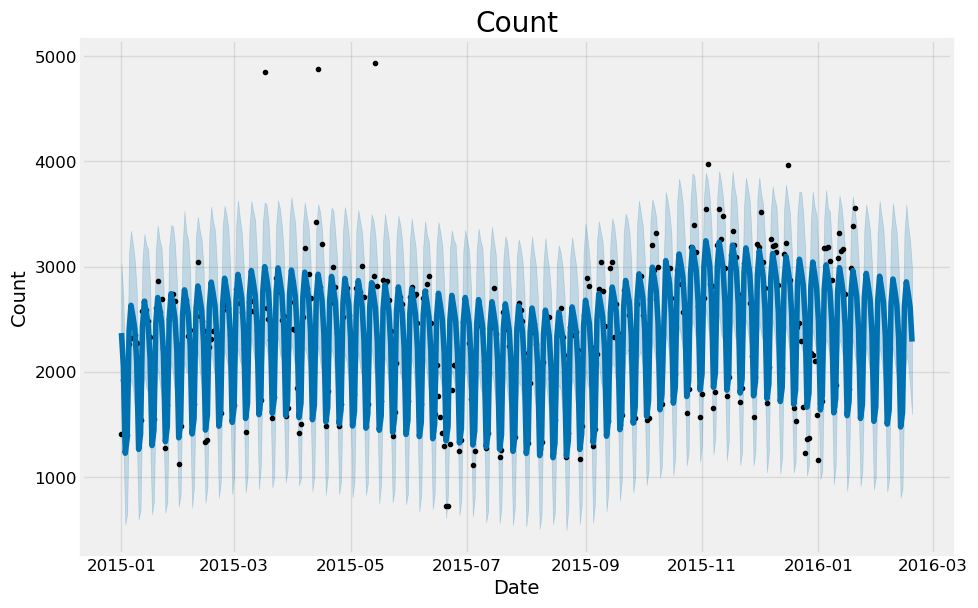

In [78]:
#plotting future forecast
plt.figure(figsize=(18, 6))
model.plot(forecast_byopt, xlabel = 'Date', ylabel = 'Count')
plt.title('Count')
plt.show()

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


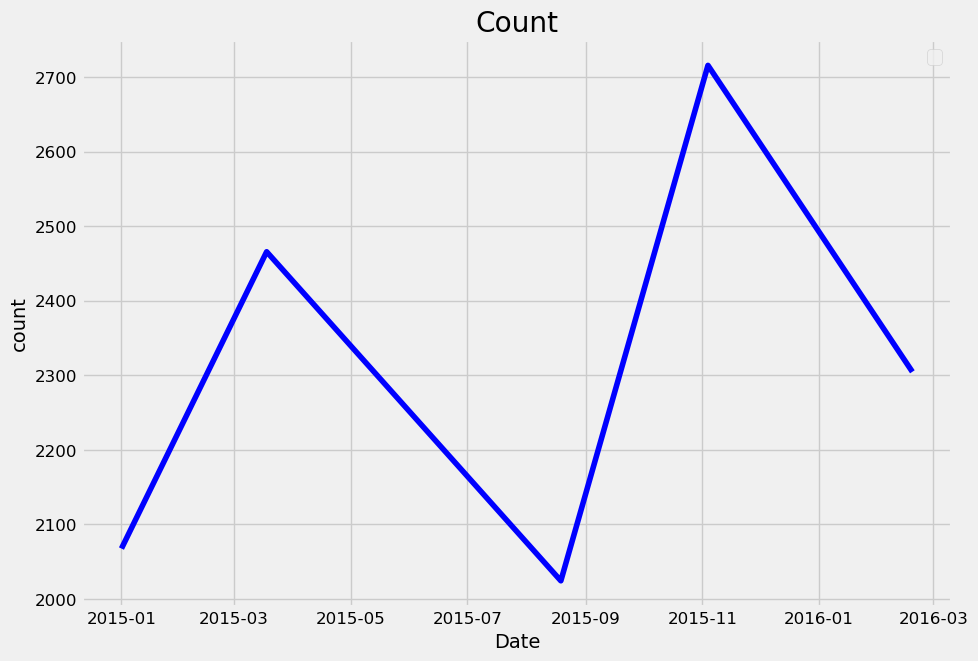

In [79]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_byopt['ds'], forecast_byopt['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

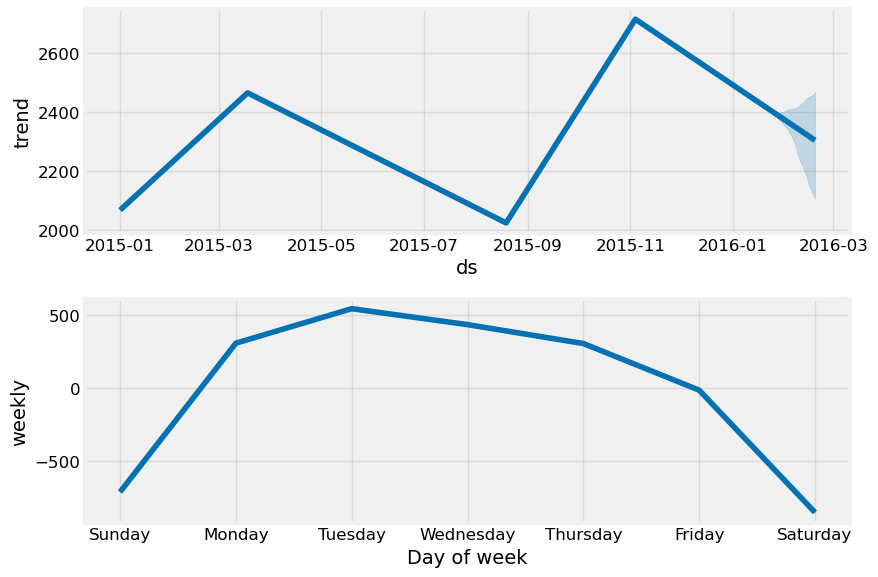

In [80]:
model.plot_components(forecast_byopt)
plt.show()

### Modelin Diagnostik qrafikləri çıxarılır

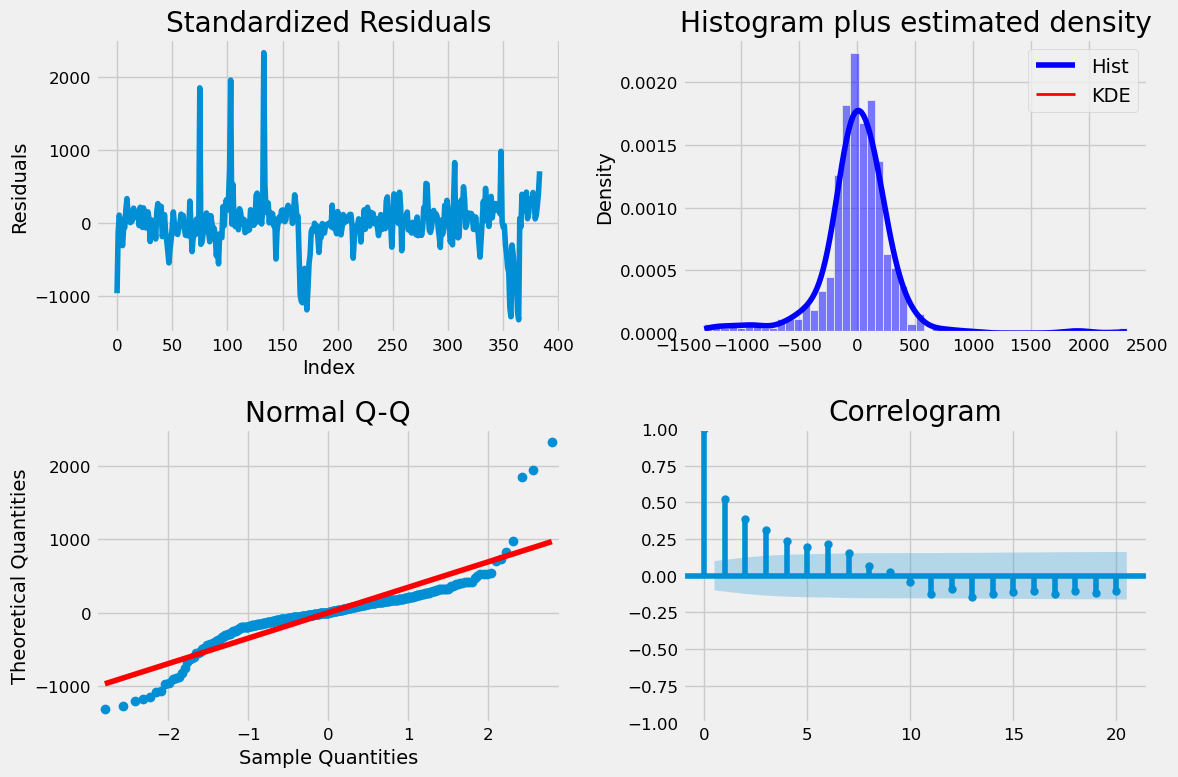

In [81]:
# Qalıqları hesablayın
residuals = df_byopt['y'] - forecast_byopt['yhat'][:len(df_byopt)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### Proqnozdan sonra metrikləri əldə etmək:

In [82]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_byopt['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_byopt['yhat'][:len(df_byopt['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.7216280304470821
Mean Absolute Error (MAE): 211.3910901105165
Mean Absolute Percentage Error (MAPE): 0.09888856258816049
Mean Squared Error (MSE): 120642.59511150983
Root Mean Squared Error (RMSE): 347.33642928939923


### Difference show with Real and Pred

In [83]:
pd.DataFrame({'date': df_byopt.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

,date,real,frcst,diff
0,2015-01-01,1414.0,2369.535505,-955.535505
1,2015-01-02,1920.0,2056.653586,-136.653586
2,2015-01-03,1338.0,1227.798426,110.201574
3,2015-01-04,1404.0,1372.217056,31.782944
4,2015-01-05,2264.0,2392.848065,-128.848065
...,...,...,...,...
379,2016-01-16,1644.0,1585.039888,58.960112
380,2016-01-17,1836.0,1720.377755,115.622245
381,2016-01-18,2983.0,2731.928002,251.071998
382,2016-01-19,3389.0,2963.457459,425.542541


## Time-series modeling with NeuralProphet

In [133]:
# !pip install neuralprophet

In [134]:
# !pip install plotly-resampler

In [135]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Selection Feature

In [136]:
df_neupt = copy.deepcopy(df)
df_neupt = df[['date', 'count']].rename(columns={"date": 'ds', "count": 'y'})
df_neupt

,ds,y
0,2015-01-01,1414.0
1,2015-01-02,1920.0
2,2015-01-03,1338.0
3,2015-01-04,1404.0
4,2015-01-05,2264.0
...,...,...
379,2016-01-16,1644.0
380,2016-01-17,1836.0
381,2016-01-18,2983.0
382,2016-01-19,3389.0


### Find Best Learning Rate

In [137]:
# !pip install optuna

In [138]:
from neuralprophet import NeuralProphet
import optuna

def objective(trial):
    model = NeuralProphet(
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
    growth="linear",
    # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
    changepoints=None,
    # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
    n_changepoints=5,
    # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
    changepoints_range=0.8,
    # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
    trend_reg=0,
    # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
    trend_reg_threshold=False,
    # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    yearly_seasonality="auto",
    # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    weekly_seasonality="auto",
    # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    daily_seasonality="auto",
    # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
    seasonality_mode="additive",
    # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
    seasonality_reg=0,
    # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
    n_forecasts=1,
    # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
    n_lags=0,
    # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
    loss_func="Huber",
    # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
    normalize="auto",
    # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
    impute_missing=True
    # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#   num_hidden_layers=0,
    # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#   d_hidden=None,     
    # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#   ar_sparsity=None,  
)
    lr = trial.suggest_loguniform('learning_rate', 0.001, 0.9)
    
    # Learning rate dəyərini çap edir
    print(f"Current trial learning rate: {lr}")    

    # Modeli fit edirik
    metrics = model.fit(df_neupt, learning_rate=lr, epochs=40, freq="D")

    if len(metrics['Loss']) > 0:
        return metrics['Loss'].iloc[-1]
    else:
        raise ValueError("Loss seriyası boşdur.")

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print("Best learning rate: ", study.best_params)

[I 2024-10-23 14:07:19,024] A new study created in memory with name: no-name-d42e0ddb-7bd8-4c60-b20c-3391d92b9d3d
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.07478516166128901


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 14:07:53,254] Trial 0 finished with value: 0.022247156128287315 and parameters: {'learning_rate': 0.07478516166128901}. Best is trial 0 with value: 0.022247156128287315.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.03993394060642804


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 14:08:27,665] Trial 1 finished with value: 0.02275613695383072 and parameters: {'learning_rate': 0.03993394060642804}. Best is trial 0 with value: 0.022247156128287315.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.009665799023019851


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 14:09:03,302] Trial 2 finished with value: 0.029246432706713676 and parameters: {'learning_rate': 0.009665799023019851}. Best is trial 0 with value: 0.022247156128287315.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.243063327708609


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 14:09:36,519] Trial 3 finished with value: 0.022164776921272278 and parameters: {'learning_rate': 0.243063327708609}. Best is trial 3 with value: 0.022164776921272278.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.0019791900702989277


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 14:10:09,293] Trial 4 finished with value: 0.1022602915763855 and parameters: {'learning_rate': 0.0019791900702989277}. Best is trial 3 with value: 0.022164776921272278.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.0035236166439507866


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 14:10:41,932] Trial 5 finished with value: 0.027884652838110924 and parameters: {'learning_rate': 0.0035236166439507866}. Best is trial 3 with value: 0.022164776921272278.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.034491892660879916


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 14:11:14,019] Trial 6 finished with value: 0.02312486432492733 and parameters: {'learning_rate': 0.034491892660879916}. Best is trial 3 with value: 0.022164776921272278.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.00127239535010336


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 14:11:43,121] Trial 7 finished with value: 0.14632035791873932 and parameters: {'learning_rate': 0.00127239535010336}. Best is trial 3 with value: 0.022164776921272278.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.


Current trial learning rate: 0.005541057717345304


INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 14:12:14,002] Trial 8 finished with value: 0.02671855501830578 and parameters: {'learning_rate': 0.005541057717345304}. Best is trial 3 with value: 0.022164776921272278.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


Current trial learning rate: 0.0032234670957341414


Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

[I 2024-10-23 14:12:48,560] Trial 9 finished with value: 0.027844322845339775 and parameters: {'learning_rate': 0.0032234670957341414}. Best is trial 3 with value: 0.022164776921272278.


Best learning rate:  {'learning_rate': 0.243063327708609}


### Craeating NeuralProphet Model vs Best Learning Rate

In [220]:
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
set_log_level("ERROR")
confidence_level = 0.95
boundaries = round((1 - confidence_level) / 2, 2)
# NeuralProphet only accepts quantiles value in between 0 and 1
quantiles = [boundaries, confidence_level + boundaries]

model = NeuralProphet(
    quantiles=quantiles,
    # Model trend növünü təyin edir: 'linear' - xətti trend, 'discontinuous' - kəsilən trend, 'off' - trend olmadan.
    growth="linear",
    # Dəyişiklik nöqtələrinin tarixlərinin siyahısı (None -> avtomatik tapılacaq).
    changepoints=None,
    # Modeldə istifadə olunacaq maksimum dəyişiklik nöqtələrinin sayı.
    n_changepoints=5,
    # Dəyişiklik nöqtələrinin yerləşdirildiyi vaxt intervalı (tarixlərin 80%-lik hissəsi daxilində).
    changepoints_range=0.8,
    # Trendə cərimə (regulyarizasiya) tətbiq etmək üçün parametr (0 - regulyarizasiya yoxdur).
    trend_reg=0,
    # Əgər doğru (True) seçilərsə, trendin sabit olması üçün müəyyən limitlər tətbiq edir.
    trend_reg_threshold=False,
    # İllik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    yearly_seasonality="auto",
    # Həftəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    weekly_seasonality="auto",
    # Gündəlik sezonsallığın olub-olmaması və ya avtomatik seçilməsi ('auto' - avtomatik müəyyənləşdirmə).
    daily_seasonality="auto",
    # Sezonsallığın modelləşdirilmə üsulu: 'additive' - toplamsal, 'multiplicative' - çoxlamalı.
    seasonality_mode="additive",
    # Sezonsallıq üçün regulyarizasiya dəyəri (0 - cərimə yoxdur).
    seasonality_reg=0,
    # Verilənlər bazasından neçə proqnoz vermək istədiyinizi təyin edir.
    n_forecasts=1,
    # Modeldə istifadə olunacaq lag sayı (0 - lag yoxdur).
    n_lags=0,
    # Zərərləri hesablamaq üçün istifadə olunan itki funksiyası ('Huber' funksiyası, zərərləri minimumlaşdırır).
    loss_func="Huber",
    # Verilənlər üçün normallaşdırma növü ('minmax', 'standardize', 'soft', 'off', 'auto' - avtomatik seçim).
    normalize="auto",
    # Verilənlərdə itkin dəyərlərin avtomatik tamamlanmasını təmin edir.
    impute_missing=True
    # Əgər AR-Net modelləşdirilirsə, gizli qatların sayı.
#   num_hidden_layers=0,
    # Gizli qatların ölçüsü (gizli qatlarda olan neyronların sayı).
#   d_hidden=None,     
    # AR (avto-regressiv) əmsallar üçün azlıq parametri (AR əmsallarında sparcity tətbiq etmək üçün).
#   ar_sparsity=None,  
)

model.set_plotting_backend("plotly-static")

metrics = model.fit(df_neupt,
    learning_rate=0.243063327708609,  # Öyrənmə sürətini manual təyin edirsiniz
    epochs=40,           
    freq="D",)

Training: |                                              | 0/? [00:00<?, ?it/s]

Training: |                                              | 0/? [00:00<?, ?it/s]

### Forecast

In [221]:
# Gələcək üçün proqnozlaşdırma dataframesi yaradır (yəni 30 period irəli) 
# Tarixi dəyərləri də nəzərə alır (n_historic_predictions=len(y))
future = model.make_future_dataframe(df_neupt, periods=30, n_historic_predictions=len(df_neupt))

# Gələcək data üçün proqnozlar yaradır
forecast_neupt = model.predict(future)

Predicting: |                                            | 0/? [00:00<?, ?it/s]

In [222]:
forecast_neupt

,ds,y,yhat1,yhat1 3.0%,yhat1 98.0%,trend,season_weekly
0,2015-01-01,1414.0,2439.928467,1779.411499,3452.892090,2135.849365,304.079224
1,2015-01-02,1920.0,2155.688721,1503.108643,2846.082031,2138.326660,17.361996
2,2015-01-03,1338.0,1275.482910,1104.363281,1825.308960,2140.803955,-865.321106
3,2015-01-04,1404.0,1421.019165,1235.414307,1943.600342,2143.281250,-722.262146
4,2015-01-05,2264.0,2461.314941,2060.823730,3113.190674,2145.758789,315.556122
...,...,...,...,...,...,...,...
409,2016-02-15,NaN,3016.018799,1945.522095,3439.251709,2700.610840,315.407959
410,2016-02-16,NaN,3197.707031,2127.176514,4368.639648,2702.214844,495.491974
411,2016-02-17,NaN,3158.846924,2032.068481,3994.469727,2703.819092,455.027893
412,2016-02-18,NaN,3009.651855,1660.212402,3800.664551,2705.423096,304.228821


In [223]:
forecast_neupt[-30:].head()

,ds,y,yhat1,yhat1 3.0%,yhat1 98.0%,trend,season_weekly
384,2016-01-21,NaN,2964.748047,1756.184204,3719.468018,2660.507324,304.240631
385,2016-01-22,NaN,2679.537598,1474.611328,3112.102783,2662.111572,17.425913
386,2016-01-23,NaN,1797.733643,1070.593506,2090.290527,2663.715576,-865.982056
387,2016-01-24,NaN,1943.141357,1197.090332,2208.927246,2665.319824,-722.178467
388,2016-01-25,NaN,2982.419678,2017.504639,3378.225830,2666.923828,315.495789


### Plotting Forecast

Predicting: |                                            | 0/? [00:00<?, ?it/s]

Predicting: |                                            | 0/? [00:00<?, ?it/s]

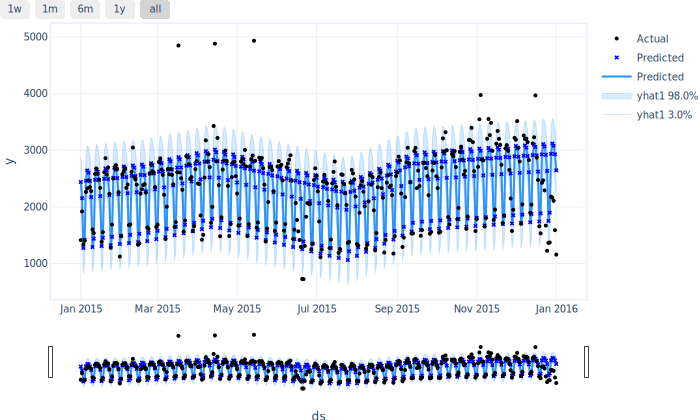

In [224]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# evaluate uncertainy on calibration set
train_df, cal_df = model.split_df(df_neupt, valid_p=0.05)
method = "naive"  # or "cqr" for a more sophisticated method, see uncertainty tutorial
conformal_forecast = model.conformal_predict(train_df, cal_df, alpha=0.1, method=method)
model.highlight_nth_step_ahead_of_each_forecast(1).plot(conformal_forecast)

### Trend Visualisation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


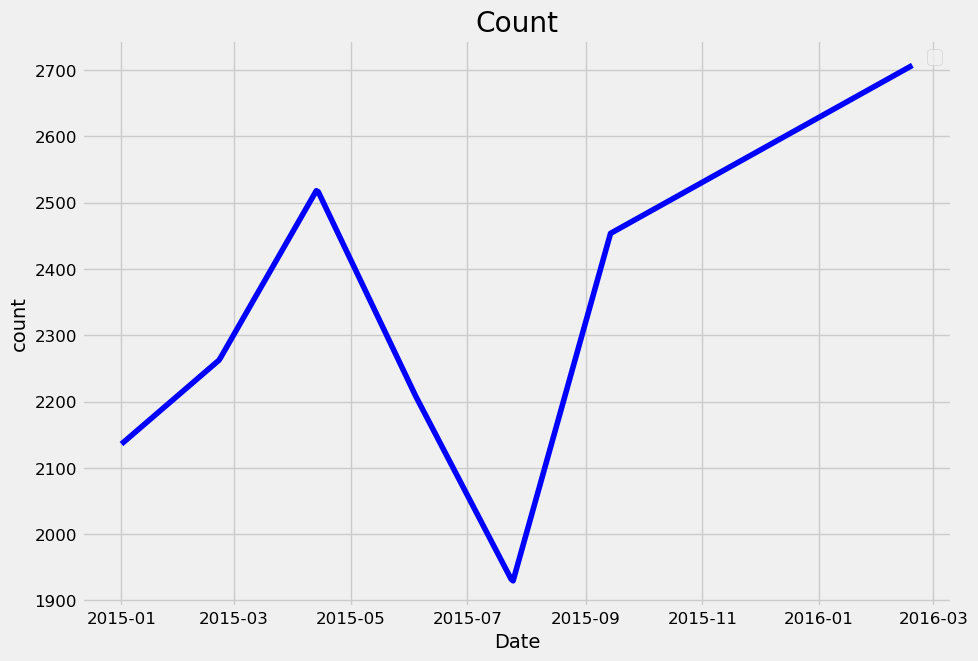

In [225]:
plt.figure(figsize=(10, 7))
plt.plot(forecast_neupt['ds'], forecast_neupt['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('count')
plt.title('Count');

### Plot Components of Time-series

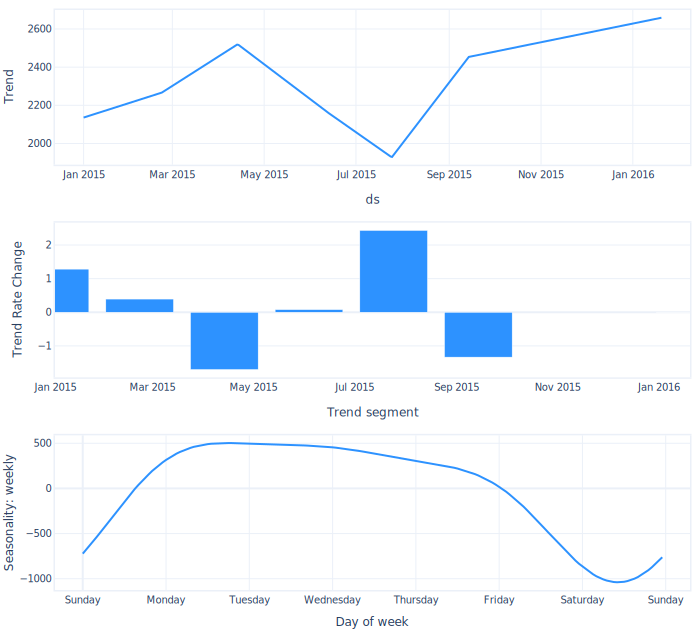

In [226]:
#plotting components of model
model.plot_parameters()

### Modelin Diagnostik qrafikləri çıxarılır

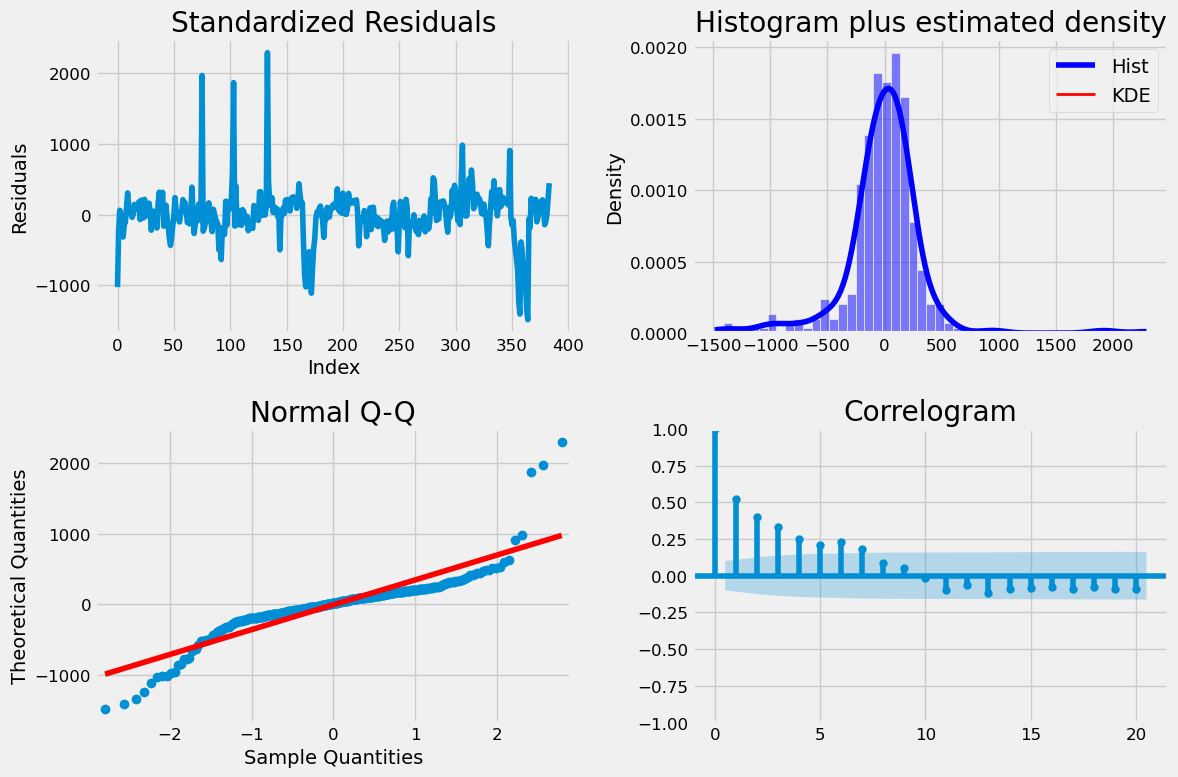

In [227]:
# Qalıqları hesablayın
residuals = df_neupt['y'] - forecast_neupt['yhat1'][:len(df_neupt)]

# Vizualizasiya üçün tərtibat
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Standartlaşdırılmış qalıqlar
axs[0, 0].plot(residuals)
axs[0, 0].set_title('Standardized Residuals')
axs[0, 0].set_xlabel('Index')
axs[0, 0].set_ylabel('Residuals')

# 2. Histogram və KDE
sns.histplot(residuals, kde=True, ax=axs[0, 1], stat='density', color='blue')
axs[0, 1].set_title('Histogram plus estimated density')
axs[0, 1].axhline(0, color='red', lw=2)
axs[0, 1].legend(['Hist', 'KDE'])

# 3. Q-Q Plot
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(residuals, line='s', ax=axs[1, 0])  # line='s' xətdə qırmızı xətt çəkmək üçündür
axs[1, 0].set_title('Normal Q-Q')
axs[1, 0].set_xlabel('Sample Quantities')
axs[1, 0].set_ylabel('Theoretical Quantities')
plt.grid(True)


# 4. Korrelogram
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axs[1, 1], lags=20)
axs[1, 1].set_title('Correlogram')

plt.tight_layout()
plt.show()

### 1. Her Epoch ucun Modelin təlimi zamanı performans ölçülərini əldə etmək:

In [228]:
# Her Epoch ucun Təlim prosesinin metriklərini əldə etmək
train_metrics = metrics
print(train_metrics)

    train_loss  reg_loss         MAE         RMSE      Loss  RegLoss  epoch
0     0.523342       0.0  918.705872  1099.900146  0.523342      0.0      0
1     0.091096       0.0  458.920868   560.662598  0.091096      0.0      1
2     0.077609       0.0  313.698395   440.869354  0.077609      0.0      2
3     0.073122       0.0  326.717407   436.632446  0.073122      0.0      3
4     0.064323       0.0  330.154449   447.522583  0.064323      0.0      4
5     0.054586       0.0  323.045197   441.399323  0.054586      0.0      5
6     0.044283       0.0  292.991364   403.112946  0.044283      0.0      6
7     0.059596       0.0  366.000641   471.020020  0.059596      0.0      7
8     0.090206       0.0  444.066315   564.473572  0.090206      0.0      8
9     0.096607       0.0  472.998322   583.883545  0.096607      0.0      9
10    0.092876       0.0  430.328705   555.430481  0.092876      0.0     10
11    0.098263       0.0  400.136627   517.563171  0.098263      0.0     11
12    0.0962

### 2. Son nəticə olaraq tək bir metrik (MAE və ya MSE) əldə etmək:

In [229]:
# Metrikləri çıxarmaq
final_mae = metrics['MAE'].values[-1]  # MAE dəyərinin sonuncu iterasiyasını əldə edir
final_rmse = metrics['RMSE'].values[-1]  # MSE dəyərinin sonuncu iterasiyasını əldə edir

# Metrikləri çap etmək
print(f"Final MAE: {final_mae}")
print(f"Final RMSE: {final_rmse}")

Final MAE: 217.42335510253906
Final RMSE: 324.644775390625


### 3. Proqnozdan sonra metrikləri əldə etmək:

In [230]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_true = df_neupt['y'] # Hədəf dəyərləri (faktiki dəyərlər)
y_pred = forecast_neupt['yhat1'][:len(df_neupt['y'])] # Proqnozlaşdırılan dəyərlər


# 1. R-squared (R2 Score)
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2 Score): {r2}")

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# 4. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 5. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R2 Score): 0.7148314016449682
Mean Absolute Error (MAE): 215.4931159455222
Mean Absolute Percentage Error (MAPE): 0.10183343831324138
Mean Squared Error (MSE): 123588.16085224722
Root Mean Squared Error (RMSE): 351.55107858211335


### Difference show with Real and Pred

In [231]:
pd.DataFrame({'date': df_neupt.ds, 'real': y_true.values, 'frcst': y_pred.values, 
                                                      'diff': y_true.values - y_pred.values})

,date,real,frcst,diff
0,2015-01-01,1414.0,2439.928467,-1025.928467
1,2015-01-02,1920.0,2155.688721,-235.688721
2,2015-01-03,1338.0,1275.482910,62.517090
3,2015-01-04,1404.0,1421.019165,-17.019165
4,2015-01-05,2264.0,2461.314941,-197.314941
...,...,...,...,...
379,2016-01-16,1644.0,1786.681641,-142.681641
380,2016-01-17,1836.0,1931.732544,-95.732544
381,2016-01-18,2983.0,2971.929932,11.070068
382,2016-01-19,3389.0,3152.794189,236.205811


### Only Forecast Data

In [235]:
forecast_neupt[-30:].head(5)

,ds,y,yhat1,yhat1 3.0%,yhat1 98.0%,trend,season_weekly
384,2016-01-21,NaN,2964.748047,1756.184204,3719.468018,2660.507324,304.240631
385,2016-01-22,NaN,2679.537598,1474.611328,3112.102783,2662.111572,17.425913
386,2016-01-23,NaN,1797.733643,1070.593506,2090.290527,2663.715576,-865.982056
387,2016-01-24,NaN,1943.141357,1197.090332,2208.927246,2665.319824,-722.178467
388,2016-01-25,NaN,2982.419678,2017.504639,3378.225830,2666.923828,315.495789
